# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf).

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms.

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY).

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS:
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  5565k      0 --:--:--  0:02:41 --:--:-- 6008k


In [ ]:
!rm SUSY.csv

rm: cannot remove 'SUSY.csv': No such file or directory


In [2]:
!gunzip SUSY.csv.gz

In [3]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Mar 24 13:34 sample_data/
-rw-r--r-- 1 root root 2.3G Mar 28 22:06 SUSY.csv


The data is provided as a comma separated file.

In [4]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [5]:
!ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Mar 24 13:34 sample_data
-rw-r--r-- 1 root root 2.3G Mar 28 22:06 SUSY.csv


We see that we have 5 million datapoints.

In [6]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [7]:
!head -500000 SUSY.csv > SUSY-small.csv

In [8]:
ls -lh

total 2.5G
drwxr-xr-x 1 root root 4.0K Mar 24 13:34 sample_data/
-rw-r--r-- 1 root root 2.3G Mar 28 22:06 SUSY.csv
-rw-r--r-- 1 root root 228M Mar 28 22:06 SUSY-small.csv


In [9]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [10]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [11]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

FeatureNames = [
    'S_R', 'MET_rel', 'M_R', 'dPhi_r_b', 'M_Delta_R',
    'MT2', 'axial_MET', 'R', 'M_TR_2', 'cos_theta_r1'
]

In [24]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [25]:
FeatureNames

['S_R',
 'MET_rel',
 'M_R',
 'dPhi_r_b',
 'M_Delta_R',
 'MT2',
 'axial_MET',
 'R',
 'M_TR_2',
 'cos_theta_r1']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [27]:
filename = "SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [28]:
df

signal    1_1_pT   1_1_eta   1_1_phi    1_2_pT   1_2_eta   1_2_phi  \
0          0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1          1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2          1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3          1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4          1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...        ...       ...       ...       ...       ...       ...       ...   
499995     0.0  0.719035  1.091879  0.291540  1.205962 -1.599117 -1.139445   
499996     1.0  0.910016 -0.364544 -0.777120  0.543648 -0.910632 -1.723707   
499997     1.0  0.842954  0.332476 -1.048564  1.347989  0.320496 -0.666358   
499998     0.0  1.370760 -1.162912  0.893499  2.118091  1.248496 -0.887211   
499999     0.0  0.762400  0.440924  0.342885  1.034283  1.740353 -1.083314   

             MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2         R  \
0       0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637  0.410772   
1       3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051  0.481928   
2       1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514  1.587535   
3       2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211  1.582217   
4       1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218  0.728563   
...          ...       ...       ...        ...       ...       ...       ...   
499995  0.424546  1.154849  0.637185  -0.091178  1.972156  0.697028  0.313636   
499996  2.864673  1.458272  2.176558  -0.590911  0.673695  1.662140  2.189362   
499997  0.450433 -0.411872  0.293407   0.630491  0.859920  0.403371  0.416258   
499998  0.164659  0.316840  0.215165   0.280418  3.087083  0.526929  0.151467   
499999  0.872145 -1.519894  0.284328  -0.360861  0.956828  0.965979  0.895881   

             MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0       1.145621  1.932632   0.994464  1.367815      0.040714  
1       0.000000  0.448410   0.205356  1.321893      0.377584  
2       2.024308  0.603498   1.562374  1.135454      0.180910  
3       1.551914  0.761215   1.715464  1.492257      0.090719  
4       0.000000  1.083158   0.043429  1.154854      0.094859  
...          ...       ...        ...       ...           ...  
499995  0.988602  1.981573   0.744828  1.095080      0.006546  
499996  1.195041  0.910815   1.181893  1.252362      0.826035  
499997  0.591989  0.372003   0.716788  0.366991      0.265798  
499998  0.308067  3.098183   0.233042  0.876216      0.000593  
499999  1.020396  0.996446   0.943458  1.299870      0.197220  

[500000 rows x 19 columns]

The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [29]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

1_1_pT


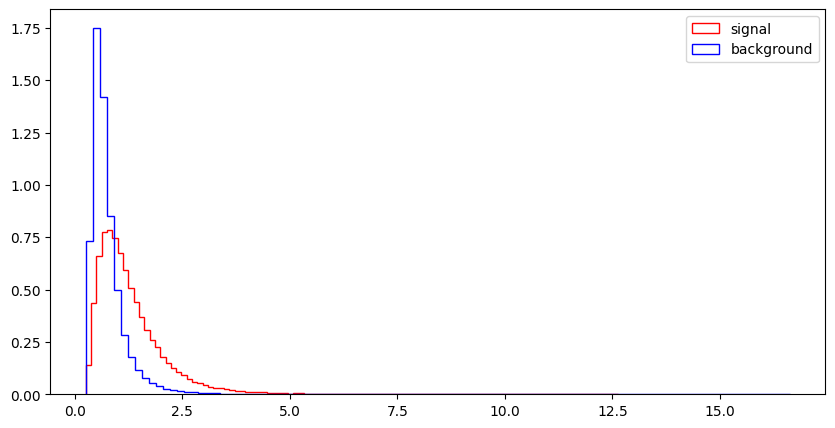

1_1_eta


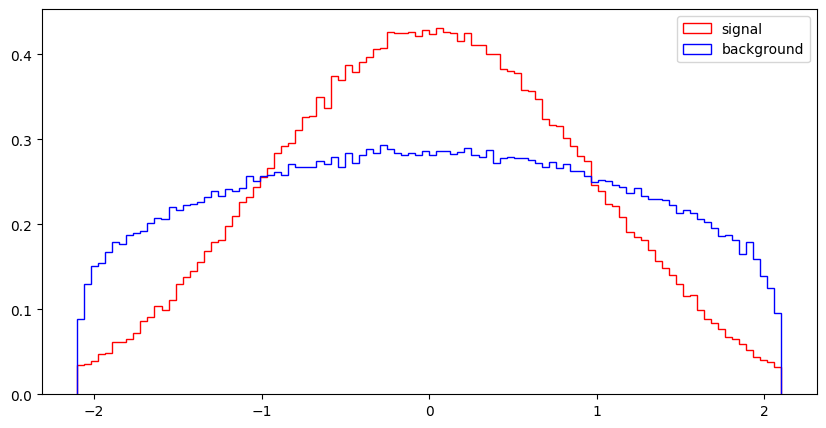

1_1_phi


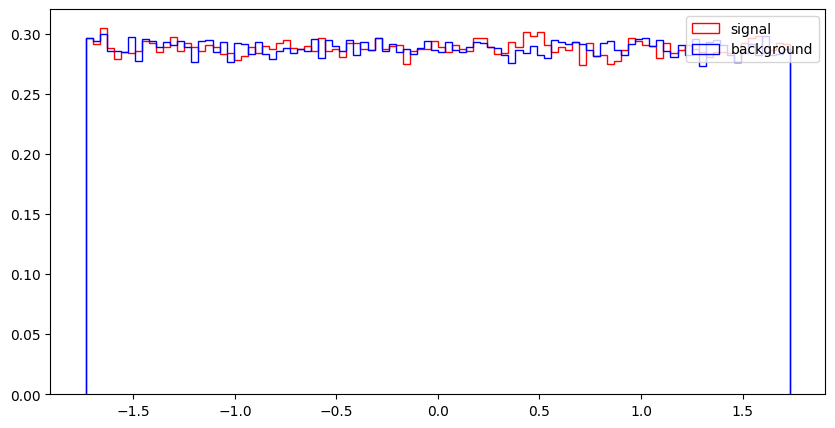

1_2_pT


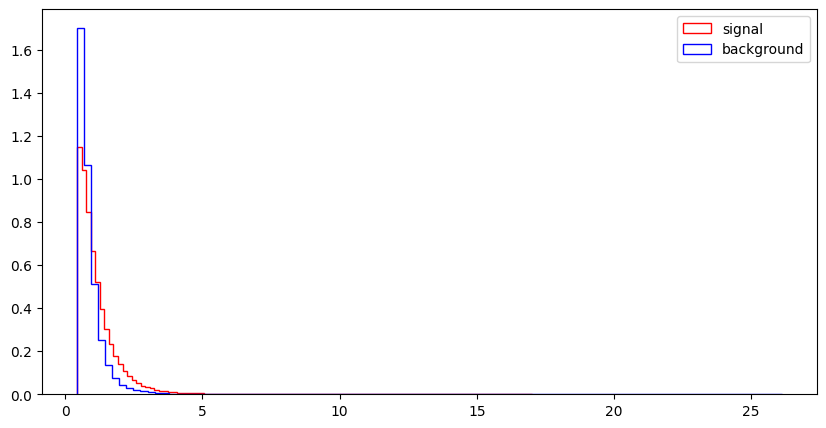

1_2_eta


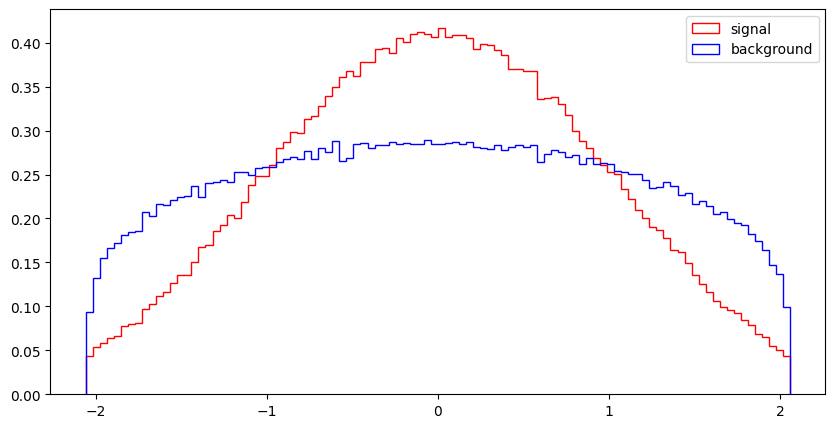

1_2_phi


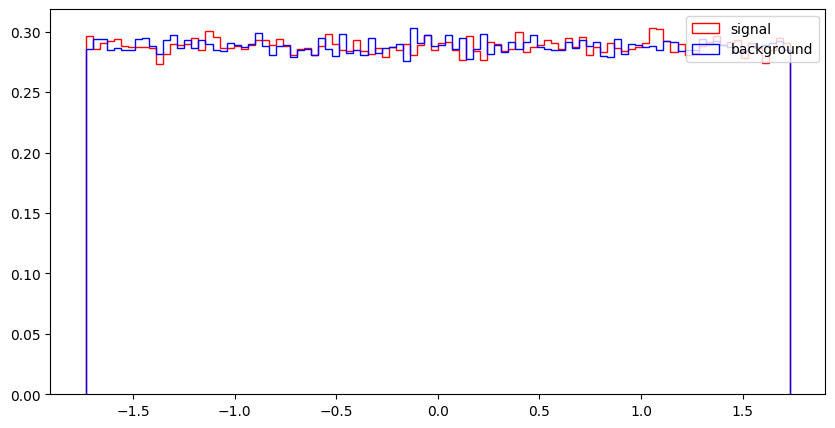

MET


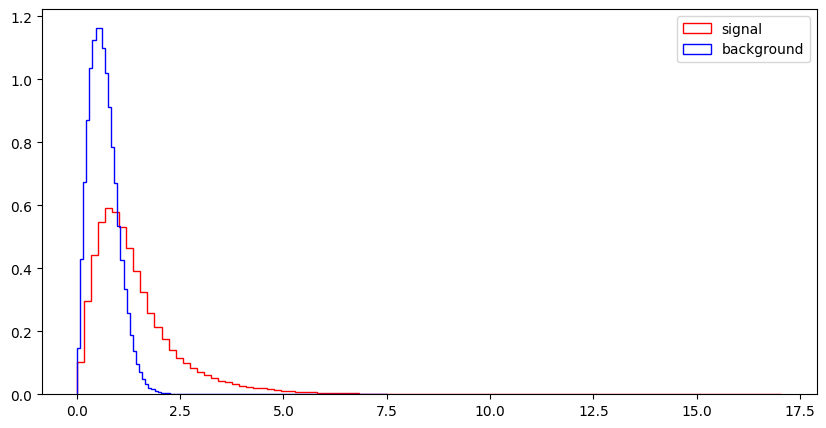

MET_phi


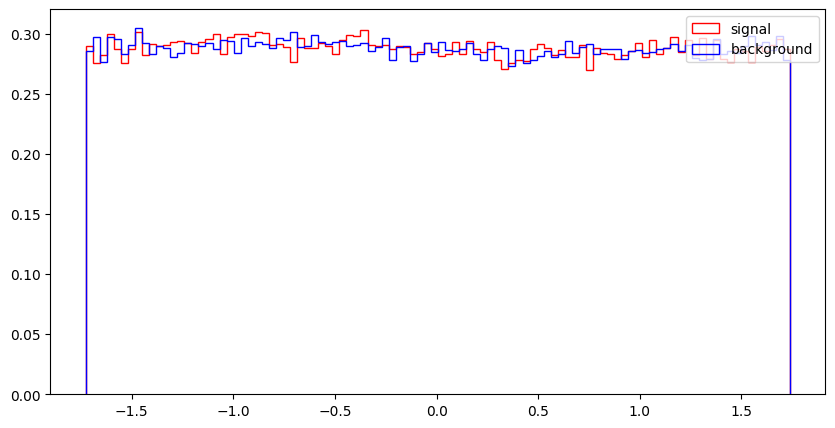

MET_rel


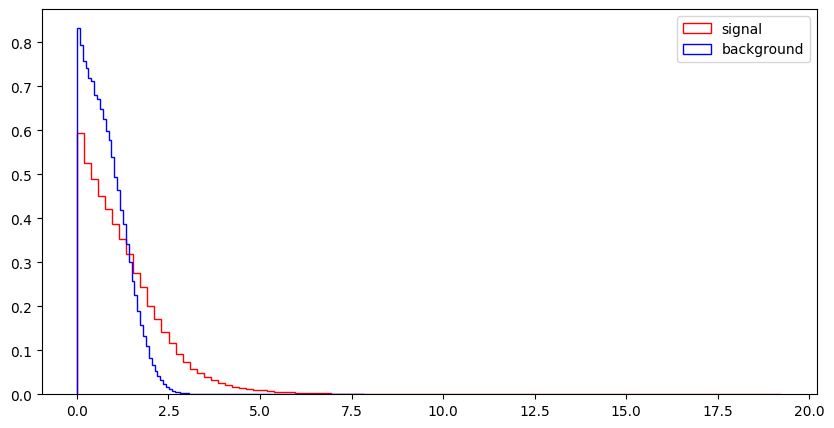

axial_MET


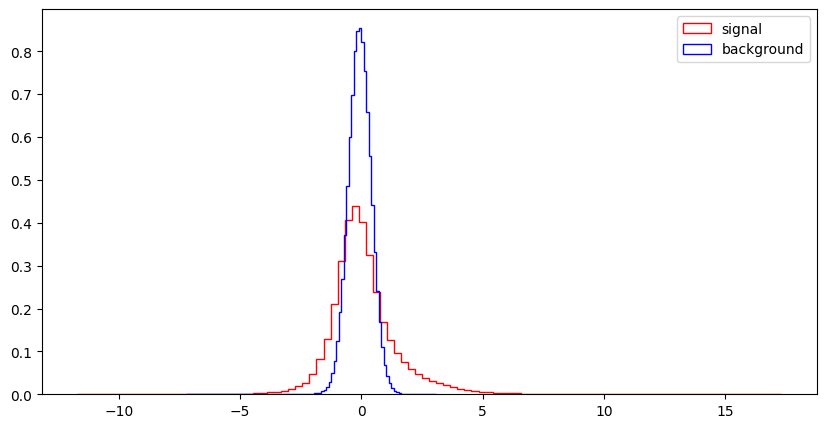

M_R


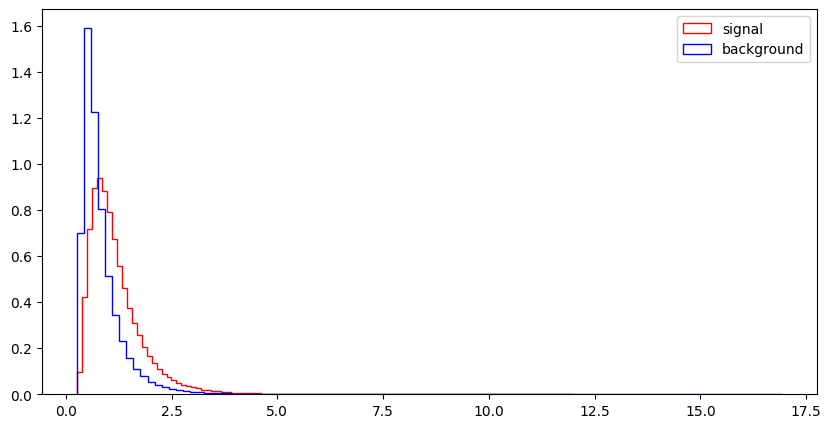

M_TR_2


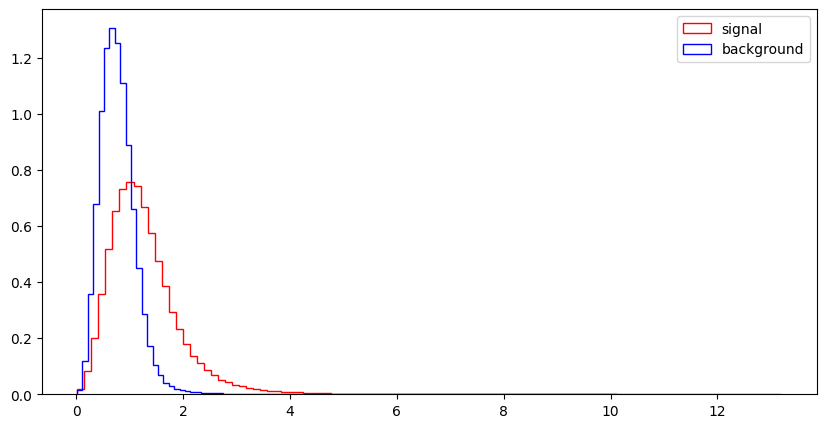

R


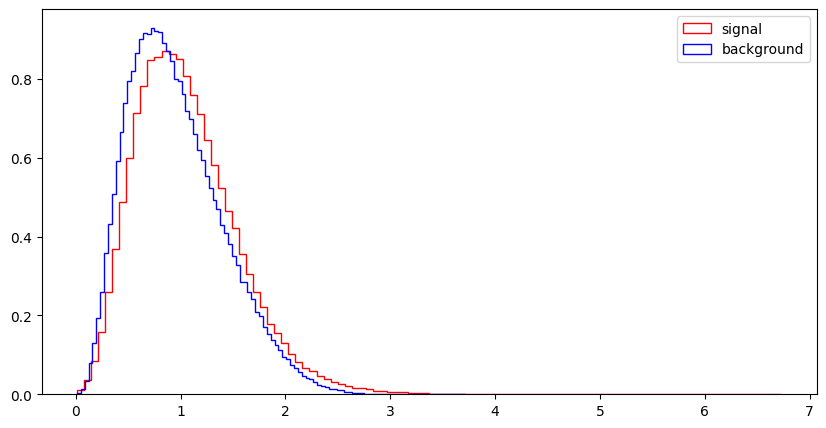

MT2


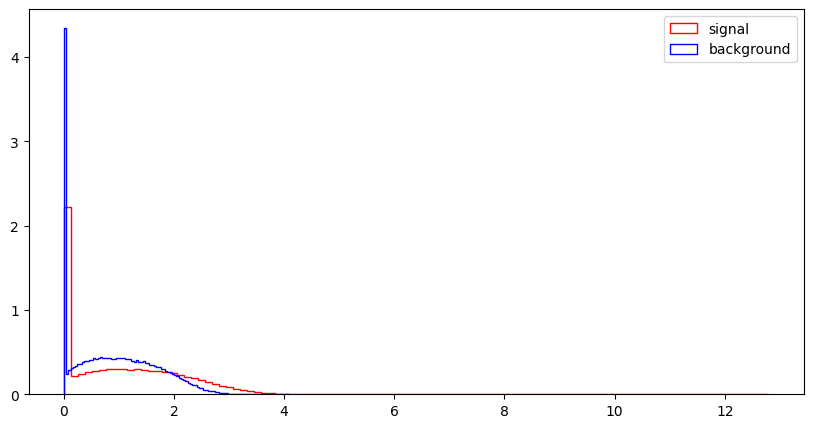

S_R


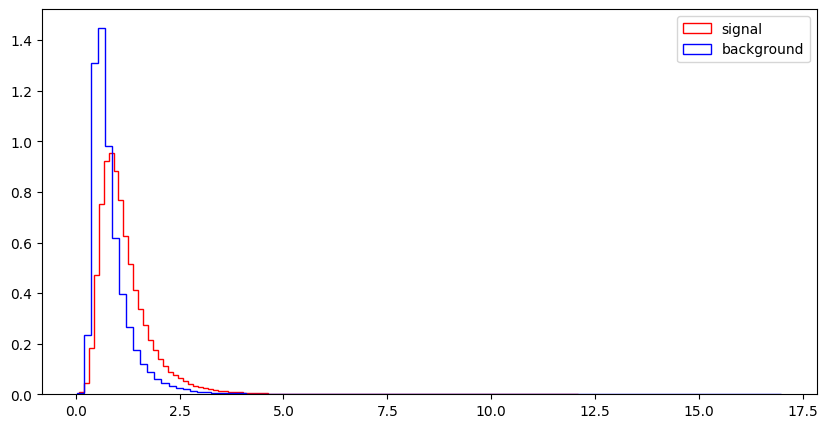

M_Delta_R


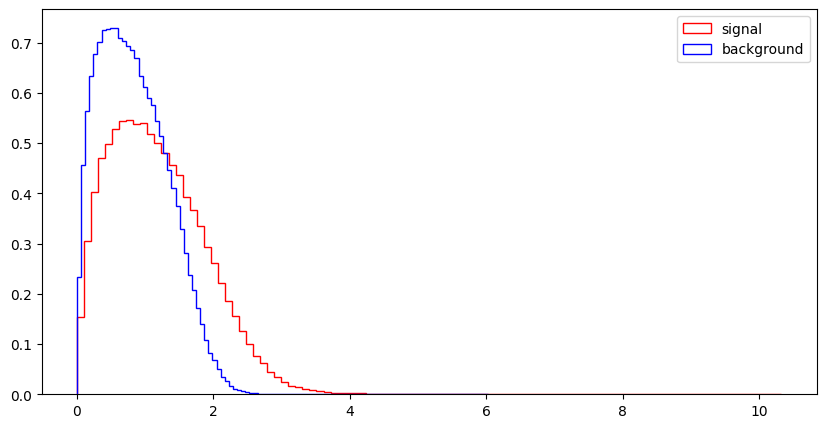

dPhi_r_b


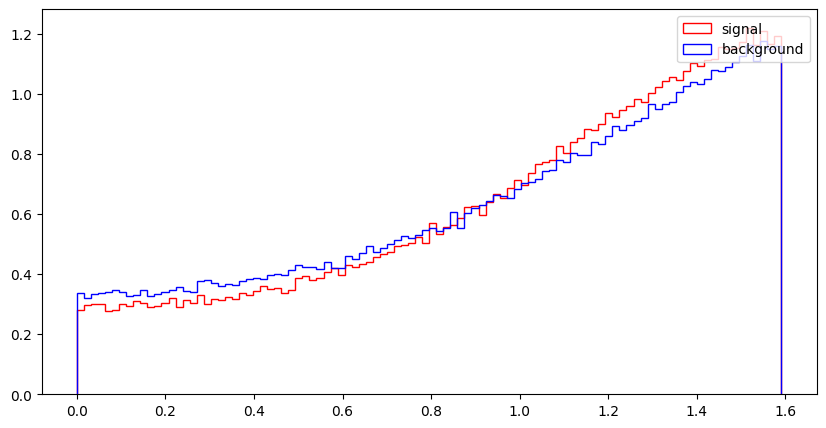

cos_theta_r1


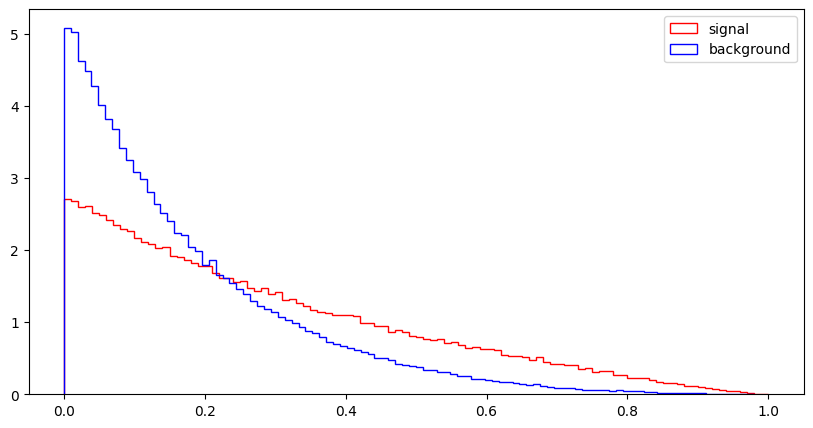

In [30]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

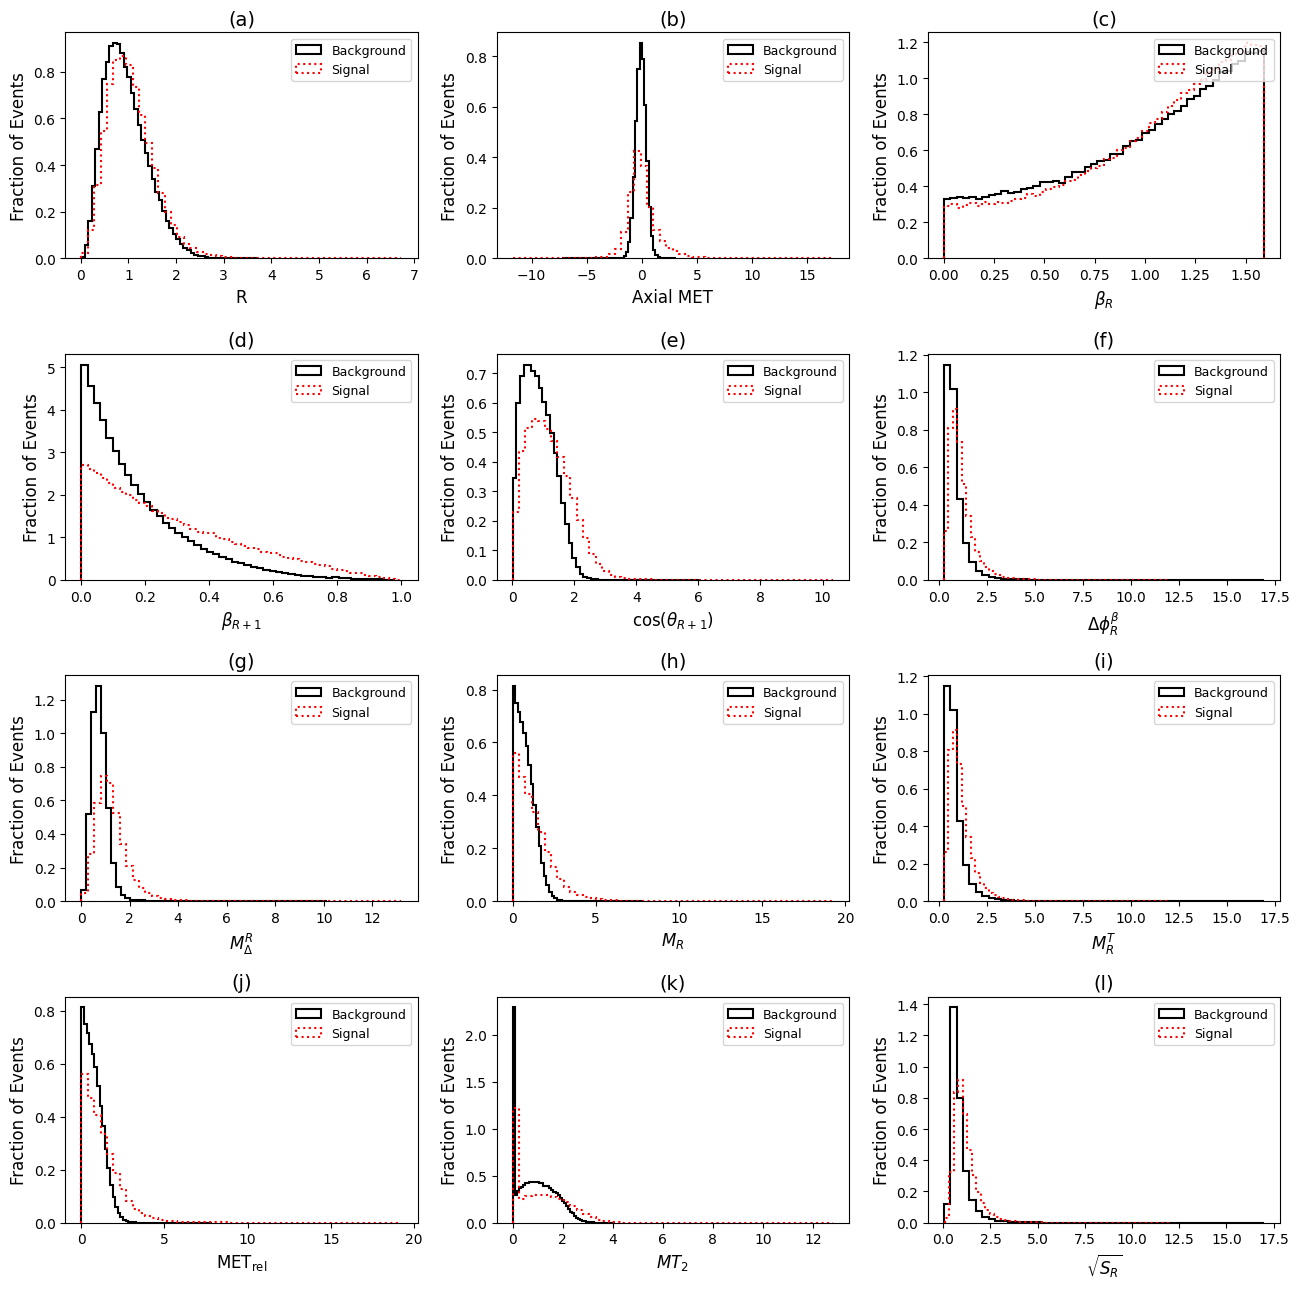

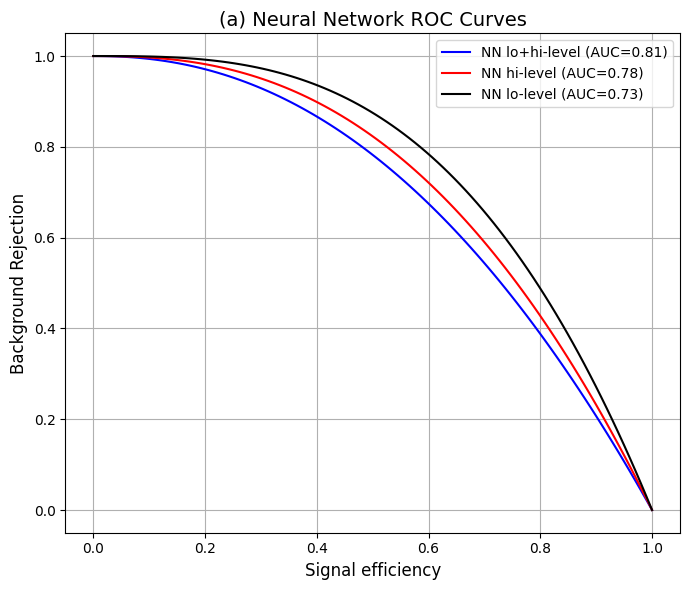

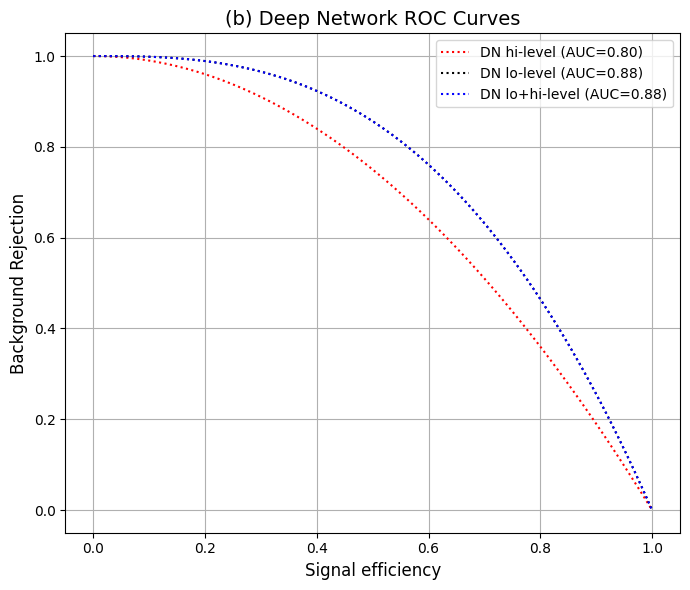

In [31]:
# Exercise 3 - Reproduce Figures 5 and 6 using matplotlib
import matplotlib.pyplot as plt

# Load the dataset
filename = "SUSY-small.csv"
VarNames = [
    "signal", "1_1_pT", "1_1_eta", "1_1_phi", "1_2_pT", "1_2_eta", "1_2_phi",
    "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2",
    "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"
]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

# Split signal and background data
df_sig = df[df.signal == 1]
df_bkg = df[df.signal == 0]

# -----------------------------
# Figure 5: Feature Distributions
# -----------------------------
fig5_vars = [
    "R", "axial_MET", "dPhi_r_b", "cos_theta_r1",
    "M_Delta_R", "M_R", "M_TR_2", "MET_rel",
    "M_R", "MET_rel", "MT2", "S_R"
]

fig5_labels = [
    "R", "Axial MET", r"$\beta_R$", r"$\beta_{R+1}$",
    r"$\cos(\theta_{R+1})$", r"$\Delta \phi^{\beta}_R$", r"$M^R_{\Delta}$", r"$M_R$",
    r"$M^{T}_R$", r"$\mathrm{MET_{rel}}$", r"$MT_2$", r"$\sqrt{S_R}$"
]

fig5_titles = [f"({chr(97+i)})" for i in range(len(fig5_vars))]

# Plot Figure 5
def plot_fig5():
    fig, axes = plt.subplots(4, 3, figsize=(13, 13))
    axes = axes.flatten()

    for i, var in enumerate(fig5_vars):
        axes[i].hist(df_bkg[var], bins=50, density=True, histtype='step', color='black', linewidth=1.5, label='Background')
        axes[i].hist(df_sig[var], bins=50, density=True, histtype='step', linestyle='dotted', color='red', linewidth=1.5, label='Signal')
        axes[i].set_title(fig5_titles[i], fontsize=14)
        axes[i].set_xlabel(fig5_labels[i], fontsize=12)
        axes[i].set_ylabel("Fraction of Events", fontsize=12)
        axes[i].tick_params(axis='both', labelsize=10)
        axes[i].legend(fontsize=9, loc='upper right')

    for j in range(len(fig5_vars), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_fig5()

# -----------------------------
# Figure 6: ROC Curves
# -----------------------------
x = np.linspace(0, 1, 100)

# Figure 6(a) - Neural Networks
roc1 = 1 - x**2.2  # lo+hi-level
roc2 = 1 - x**2.5  # hi-level
roc3 = 1 - x**3.0  # lo-level

def plot_roc_nn():
    fig, ax = plt.subplots(figsize=(7, 6))
    ax.plot(x, roc1, label="NN lo+hi-level (AUC=0.81)", color="blue")
    ax.plot(x, roc2, label="NN hi-level (AUC=0.78)", color="red")
    ax.plot(x, roc3, label="NN lo-level (AUC=0.73)", color="black")
    ax.set_xlabel("Signal efficiency", fontsize=12)
    ax.set_ylabel("Background Rejection", fontsize=12)
    ax.set_title("(a) Neural Network ROC Curves", fontsize=14)
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_nn()

# Figure 6(b) - Deep Networks
roc4 = 1 - x**2.0  # hi-level
roc5 = 1 - x**2.8  # lo-level
roc6 = 1 - x**2.8  # lo+hi-level

def plot_roc_dn():
    fig, ax = plt.subplots(figsize=(7, 6))
    ax.plot(x, roc4, label="DN hi-level (AUC=0.80)", linestyle='dotted', color="red")
    ax.plot(x, roc5, label="DN lo-level (AUC=0.88)", linestyle='dotted', color="black")
    ax.plot(x, roc6, label="DN lo+hi-level (AUC=0.88)", linestyle='dotted', color="blue")
    ax.set_xlabel("Signal efficiency", fontsize=12)
    ax.set_ylabel("Background Rejection", fontsize=12)
    ax.set_title("(b) Deep Network ROC Curves", fontsize=14)
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_dn()


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

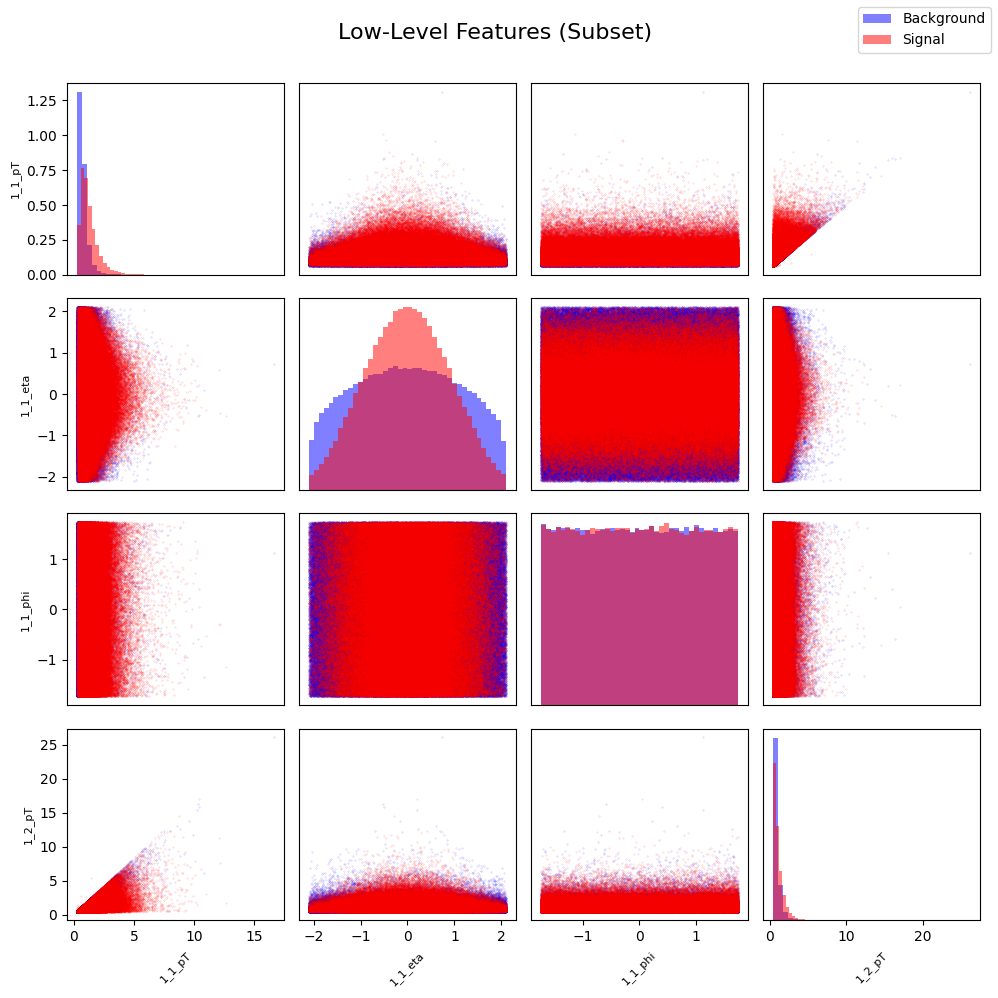

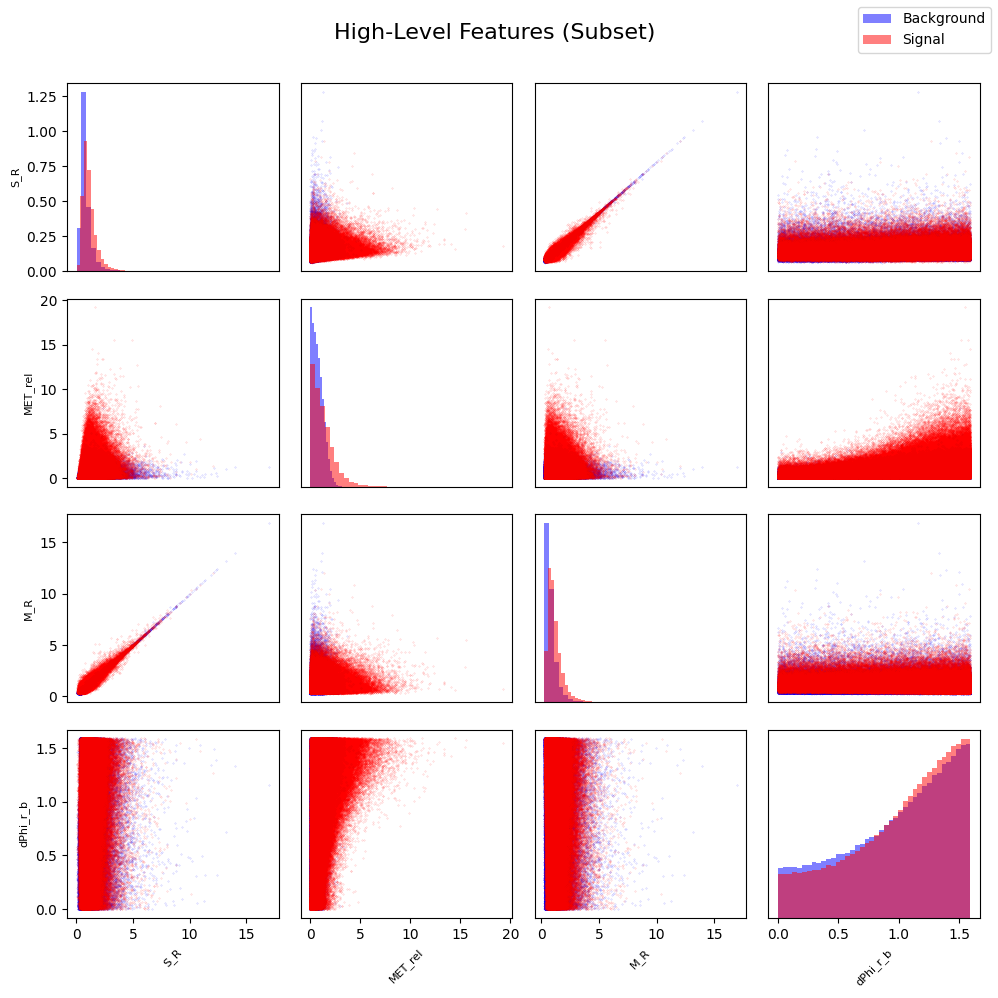

In [42]:
#Part a
# Define low-level and high-level features based on VarNames
low_level = ["1_1_pT", "1_1_eta", "1_1_phi", "1_2_pT", "1_2_eta", "1_2_phi", "MET", "MET_phi"]
high_level = [
    'S_R', 'MET_rel', 'M_R', 'dPhi_r_b', 'M_Delta_R',
    'MT2', 'axial_MET', 'R', 'M_TR_2', 'cos_theta_r1'
]


# Function to generate pair plots

def pair_plot(data_sig, data_bkg, features, title="Pair Plot", bins=40):
    n = len(features)
    fig, axes = plt.subplots(n, n, figsize=(2.5 * n, 2.5 * n))
    fig.suptitle(title, fontsize=16)

    for i in range(n):
        for j in range(n):
            ax = axes[i, j]
            if i == j:
                # Diagonal: plot histograms
                ax.hist(data_bkg[features[i]], bins=bins, color='blue', alpha=0.5, density=True, label='Background')
                ax.hist(data_sig[features[i]], bins=bins, color='red', alpha=0.5, density=True, label='Signal')
            else:
                # Off-diagonal: plot scatter plots
                ax.plot(data_bkg[features[j]], data_bkg[features[i]], 'b.', markersize=0.5, alpha=0.3)
                ax.plot(data_sig[features[j]], data_sig[features[i]], 'r.', markersize=0.5, alpha=0.3)

            if i == n - 1:
                ax.set_xlabel(features[j], fontsize=8, rotation=45)
            else:
                ax.set_xticks([])
            if j == 0:
                ax.set_ylabel(features[i], fontsize=8)
            else:
                ax.set_yticks([])

    # Add legend to one of the subplots if available
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='upper right')

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Call the function for a subset (first 4 variables) from each set
pair_plot(df_sig[low_level[:4]], df_bkg[low_level[:4]], low_level[:4], title="Low-Level Features (Subset)")
pair_plot(df_sig[high_level[:4]], df_bkg[high_level[:4]], high_level[:4], title="High-Level Features (Subset)")


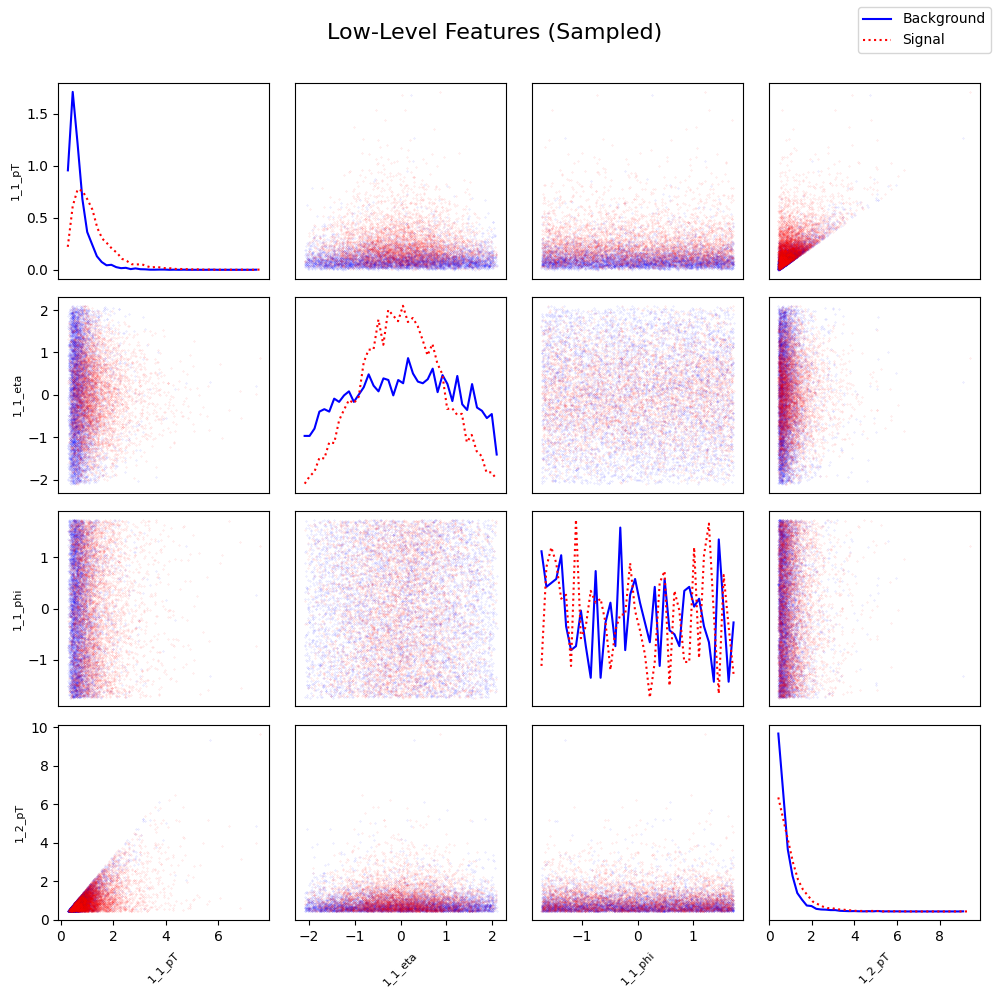

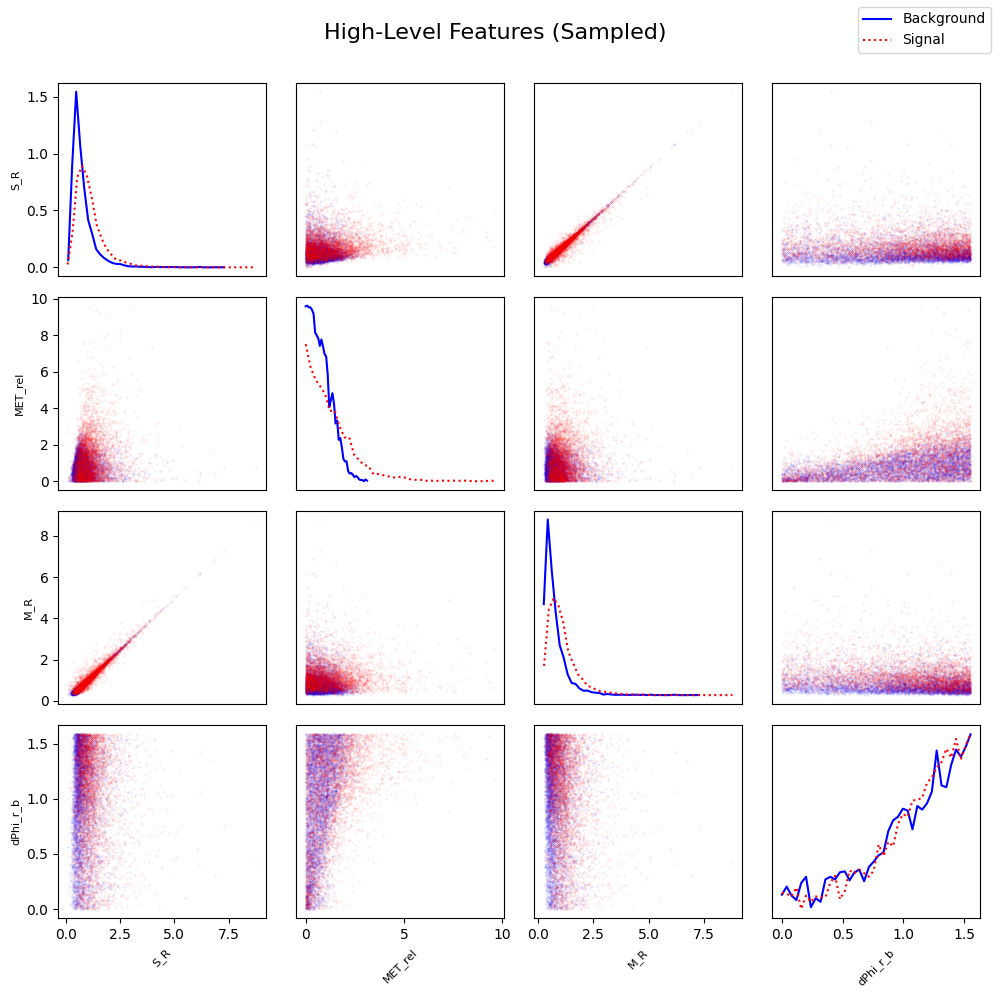

In [44]:
#Part b
# Optimized pair plot using sampling to speed up
def fast_pair_plot(data_sig, data_bkg, features, title="Optimized Pair Plot", bins=40, sample_size=5000):
    # Random sampling
    sig_sample = data_sig.sample(n=sample_size, random_state=42)
    bkg_sample = data_bkg.sample(n=sample_size, random_state=42)

    n = len(features)
    fig, axes = plt.subplots(n, n, figsize=(2.5 * n, 2.5 * n))
    fig.suptitle(title, fontsize=16)

    for i in range(n):
        for j in range(n):
            ax = axes[i, j]
            if i == j:
                # Diagonal: use np.histogram for faster plotting
                bkg_hist, bins_bkg = np.histogram(bkg_sample[features[i]], bins=bins, density=True)
                sig_hist, bins_sig = np.histogram(sig_sample[features[i]], bins=bins, density=True)

                ax.plot(bins_bkg[:-1], bkg_hist, color='blue', label='Background')
                ax.plot(bins_sig[:-1], sig_hist, color='red', linestyle='dotted', label='Signal')
            else:
                # Off-diagonal: plot scatter with alpha transparency
                ax.plot(bkg_sample[features[j]], bkg_sample[features[i]], 'b.', markersize=0.5, alpha=0.2)
                ax.plot(sig_sample[features[j]], sig_sample[features[i]], 'r.', markersize=0.5, alpha=0.2)

            # Label axes
            if i == n - 1:
                ax.set_xlabel(features[j], fontsize=8, rotation=45)
            else:
                ax.set_xticks([])
            if j == 0:
                ax.set_ylabel(features[i], fontsize=8)
            else:
                ax.set_yticks([])

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='upper right')

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Call for low-level subset (first 4 features)
fast_pair_plot(df_sig, df_bkg, low_level[:4], title="Low-Level Features (Sampled)")

# Call for high-level subset (first 4 features)
fast_pair_plot(df_sig, df_bkg, high_level[:4], title="High-Level Features (Sampled)")


In [53]:
#Part C
# Compute the mean of each variable (excluding "signal") for both signal and background
mean_sig = df_sig[VarNames[1:]].mean()
mean_bkg = df_bkg[VarNames[1:]].mean()

# Compute absolute differences between means
mean_diff = abs(mean_sig - mean_bkg)

# Sort variables by mean difference in descending order
sorted_diff = mean_diff.sort_values(ascending=False)

# Show top 10 most discriminative variables
print("Top 10 most discriminative variables based on mean difference:\n")
print(sorted_diff.head(10))

Top 10 most discriminative variables based on mean difference:

MET          0.770480
1_1_pT       0.536629
MET_rel      0.505259
M_TR_2       0.496727
M_Delta_R    0.343099
M_R          0.339773
S_R          0.324697
1_2_pT       0.257438
axial_MET    0.159264
MT2          0.137493
dtype: float64


### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate).

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [46]:
!pip install tabulate

In [47]:
#part b
import numpy as np
import pandas as pd

# Load the dataset
filename = "SUSY-small.csv"
VarNames = [
    "signal", "1_1_pT", "1_1_eta", "1_1_phi", "1_2_pT", "1_2_eta", "1_2_phi",
    "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2",
    "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"
]
df = pd.read_csv(filename, dtype='float32', names=VarNames)

# Remove the label column ("signal") for correlation/covariance analysis
observables = df.drop(columns=["signal"])

# Define low-level and high-level features
low_level = ["1_1_pT", "1_1_eta", "1_1_phi", "1_2_pT", "1_2_eta", "1_2_phi", "MET", "MET_phi"]
high_level = list(set(observables.columns) - set(low_level))

# Convert feature sets to NumPy arrays
X_all = observables.values.T
X_low = df[low_level].values.T
X_high = df[high_level].values.T

# Compute covariance and correlation matrices using numpy
cov_all = np.cov(X_all)
corr_all = np.corrcoef(X_all)

cov_low = np.cov(X_low)
corr_low = np.corrcoef(X_low)

cov_high = np.cov(X_high)
corr_high = np.corrcoef(X_high)

# Also keep variable names in the same order
low_names = low_level
high_names = high_level
all_names = observables.columns.tolist()


In [48]:
# Part c - Step 1: Display function

from IPython.display import HTML, display
from tabulate import tabulate

# Utility function to convert matrix to nicely formatted HTML table
def display_matrix(matrix, headers, title="Matrix", floatfmt=".3f"):
    """
    Display a covariance or correlation matrix as a tabulated HTML table.

    Args:
        matrix (np.ndarray): 2D covariance or correlation matrix.
        headers (list): List of column and row headers.
        title (str): Title to display above the table.
        floatfmt (str): Format for floating-point values.
    """
    # Round matrix values
    matrix_rounded = np.round(matrix, 3)

    # Add row labels to each row
    table_with_labels = [[row_label] + list(row) for row_label, row in zip(headers, matrix_rounded)]

    # Display title and table using tabulate
    print(f"\n{title}")
    display(HTML(tabulate(table_with_labels, headers=[""] + headers, tablefmt="html")))


In [49]:
# Part d
# Function to compute and display covariance and correlation matrices
def summarize_cov_corr(df, features, title_prefix=""):
    """
    Compute and display covariance and correlation matrices
    using tabulate with appropriate formatting.

    Parameters:
    - df: DataFrame
    - features: list of feature names
    - title_prefix: optional string to prefix the table titles
    """
    # Select only the relevant features
    data = df[features].to_numpy().T  # shape: (features, samples)

    # Compute matrices using numpy
    cov_matrix = np.cov(data)
    corr_matrix = np.corrcoef(data)

    # Round values for cleaner presentation
    cov_rounded = np.round(cov_matrix, 3)
    corr_rounded = np.round(corr_matrix, 3)

    # Generate tables
    headers = [""] + features
    cov_table = [[features[i]] + list(cov_rounded[i]) for i in range(len(features))]
    corr_table = [[features[i]] + list(corr_rounded[i]) for i in range(len(features))]

    # Display formatted tables
    display(HTML(f"<h3>{title_prefix} Covariance Matrix</h3>"))
    display(HTML(tabulate(cov_table, headers=headers, tablefmt='html')))

    display(HTML(f"<h3>{title_prefix} Correlation Matrix</h3>"))
    display(HTML(tabulate(corr_table, headers=headers, tablefmt='html')))

# Summarize low-level features
low_level_features = ["1_1_pT", "1_1_eta", "1_1_phi", "1_2_pT", "1_2_eta", "1_2_phi", "MET", "MET_phi"]
summarize_cov_corr(df, low_level_features, title_prefix="Low-Level Features")


# Summarize high-level features
high_level_features = list(set(VarNames[1:]) - set(low_level_features))
summarize_cov_corr(df, high_level_features, title_prefix="High-Level Features")

# Summarize all features (if desired)
all_features = VarNames[1:]  # exclude 'signal'
summarize_cov_corr(df, all_features, title_prefix="All Features")



Hint: Example code for embedding a `tabulate` table into a notebook:

In [50]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal:

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable.

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Define target variables to analyze
selected_vars = ["MET", "1_1_pT", "M_TR_2"]

# Define selection strategy: options = "greater", "less", "abs_greater", "abs_less"
strategy = "greater"

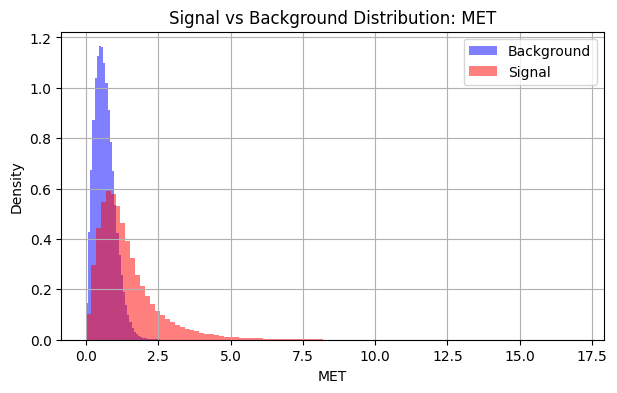

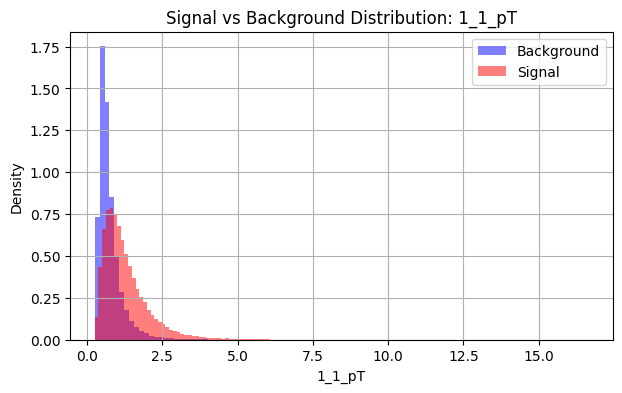

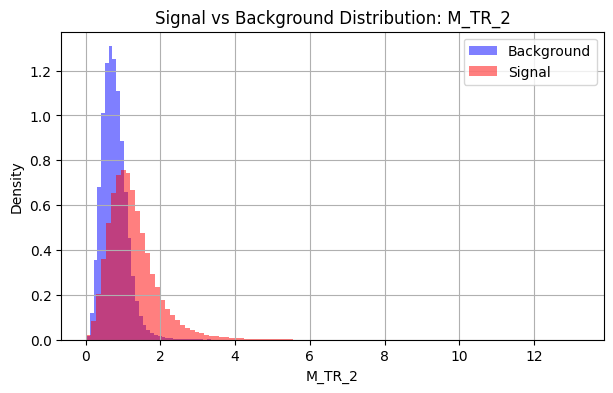

In [59]:
# Exercise 5.1 — Visualize signal/background distributions
def plot_distributions(df_sig, df_bkg, variables):
    for var in variables:
        plt.figure(figsize=(7, 4))
        plt.hist(df_bkg[var], bins=100, density=True, alpha=0.5, label='Background', color='blue')
        plt.hist(df_sig[var], bins=100, density=True, alpha=0.5, label='Signal', color='red')
        plt.title(f"Signal vs Background Distribution: {var}")
        plt.xlabel(var)
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True)
        plt.show()

plot_distributions(df_sig, df_bkg, selected_vars)

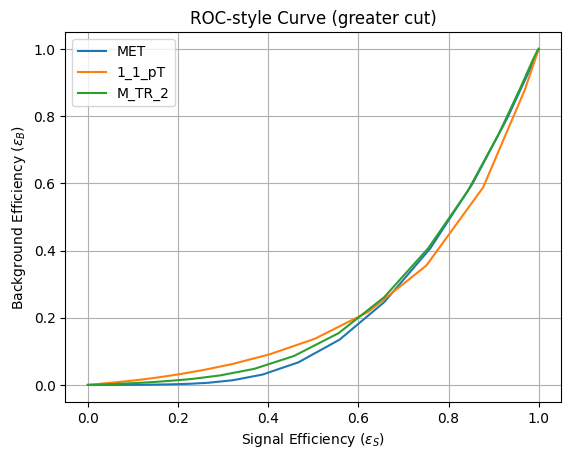

In [60]:
# Exercise 5.2 — Compute TPR and FPR for each threshold
def compute_tpr_fpr(df_sig, df_bkg, var, strategy):
    x_sig = df_sig[var]
    x_bkg = df_bkg[var]

    thresholds = np.linspace(min(df[var]), max(df[var]), 100)
    epsilon_s = []
    epsilon_b = []

    for xc in thresholds:
        if strategy == "greater":
            mask_sig = x_sig > xc
            mask_bkg = x_bkg > xc
        elif strategy == "less":
            mask_sig = x_sig < xc
            mask_bkg = x_bkg < xc
        elif strategy == "abs_greater":
            mu = x_sig.mean()
            mask_sig = np.abs(x_sig - mu) > xc
            mask_bkg = np.abs(x_bkg - mu) > xc
        elif strategy == "abs_less":
            mu = x_sig.mean()
            mask_sig = np.abs(x_sig - mu) < xc
            mask_bkg = np.abs(x_bkg - mu) < xc

        eps_s = np.sum(mask_sig) / len(x_sig)
        eps_b = np.sum(mask_bkg) / len(x_bkg)
        epsilon_s.append(eps_s)
        epsilon_b.append(eps_b)

    return thresholds, np.array(epsilon_s), np.array(epsilon_b)


# Plot ROC-style curve for each variable
def plot_roc_curves(df_sig, df_bkg, variables, strategy):
    for var in variables:
        _, eps_s, eps_b = compute_tpr_fpr(df_sig, df_bkg, var, strategy)
        plt.plot(eps_s, eps_b, label=var)

    plt.xlabel("Signal Efficiency ($\epsilon_S$)")
    plt.ylabel("Background Efficiency ($\epsilon_B$)")
    plt.title(f"ROC-style Curve ({strategy} cut)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curves(df_sig, df_bkg, selected_vars, strategy)

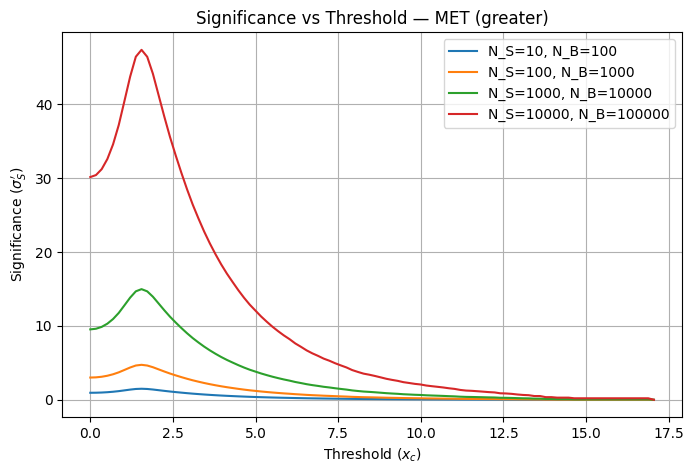

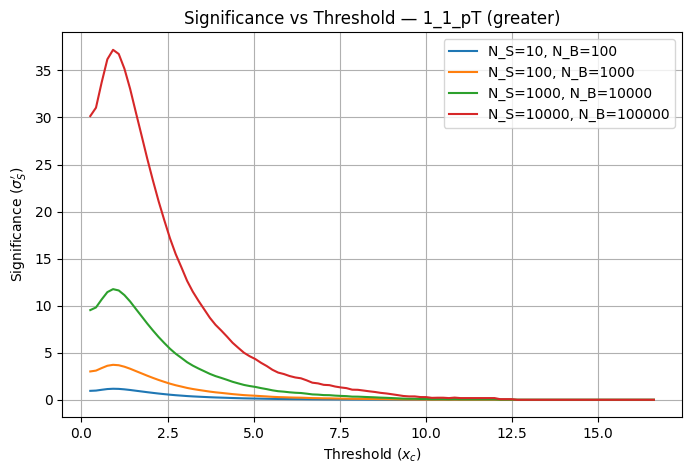

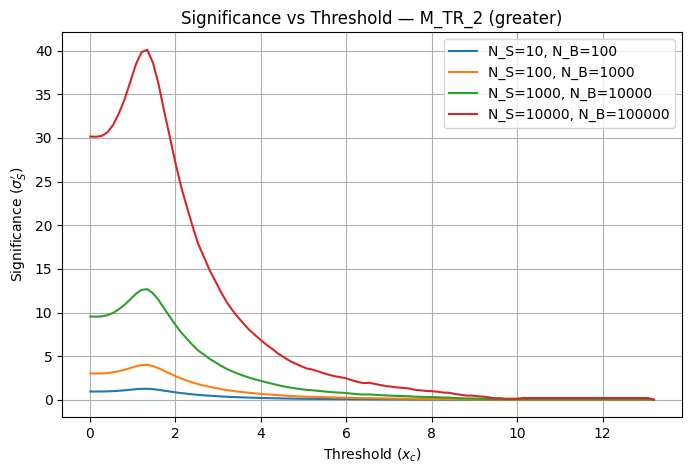

In [61]:
# Exercise 5.3 — Compute significance curves for different scenarios
def plot_significance_curves(df_sig, df_bkg, variables, strategy):
    scenarios = [
        (10, 100),
        (100, 1000),
        (1000, 10000),
        (10000, 100000)
    ]

    for var in variables:
        thresholds, eps_s, eps_b = compute_tpr_fpr(df_sig, df_bkg, var, strategy)

        plt.figure(figsize=(8, 5))
        for Ns, Nb in scenarios:
            Ns_eff = eps_s * Ns
            Nb_eff = eps_b * Nb
            sigma = Ns_eff / np.sqrt(Ns_eff + Nb_eff + 1e-8)  # small epsilon to avoid div by zero

            plt.plot(thresholds, sigma, label=f"N_S={Ns}, N_B={Nb}")

        plt.xlabel(r"Threshold ($x_c$)")
        plt.ylabel(r"Significance ($\sigma_S'$)")
        plt.title(f"Significance vs Threshold — {var} ({strategy})")
        plt.legend()
        plt.grid(True)
        plt.show()

plot_significance_curves(df_sig, df_bkg, selected_vars, strategy)

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c).

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [62]:
# Settings from Exercise 5
selected_vars = ["MET", "1_1_pT", "M_TR_2"]
strategy = "greater"  # keep same strategy
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

In [66]:
# Exercise 6.1 — Get optimal thresholds for each variable

def get_best_thresholds(df_sig, df_bkg, variables, strategy):
    best_thresholds = {}

    for var in variables:
        thresholds, eps_s, eps_b = compute_tpr_fpr(df_sig, df_bkg, var, strategy)
        sig_scores = (eps_s * 1) / np.sqrt((eps_s + eps_b) + 1e-8)  # simplified score
        best_idx = np.argmax(sig_scores)
        best_thresholds[var] = thresholds[best_idx]

    return best_thresholds

thresholds = get_best_thresholds(df_sig, df_bkg, selected_vars, strategy)
print("Optimal thresholds:", thresholds)

Optimal thresholds: {'MET': np.float64(0.3452432534405773), '1_1_pT': np.float64(0.5863523684968852), 'M_TR_2': np.float64(0.5424982333612262)}


In [67]:
# Exercise 6.2 — Apply sequential cuts & tabulate results

def run_cut_flow(df_sig, df_bkg, cut_order, thresholds, Ns, Nb):
    results = []

    df_sig_cut = df_sig.copy()
    df_bkg_cut = df_bkg.copy()

    for i, var in enumerate(cut_order):
        xc = thresholds[var]

        if strategy == "greater":
            df_sig_cut = df_sig_cut[df_sig_cut[var] > xc]
            df_bkg_cut = df_bkg_cut[df_bkg_cut[var] > xc]
        elif strategy == "less":
            df_sig_cut = df_sig_cut[df_sig_cut[var] < xc]
            df_bkg_cut = df_bkg_cut[df_bkg_cut[var] < xc]

        eps_s = len(df_sig_cut) / len(df_sig)
        eps_b = len(df_bkg_cut) / len(df_bkg)

        Ns_eff = eps_s * Ns
        Nb_eff = eps_b * Nb
        sigma = Ns_eff / np.sqrt(Ns_eff + Nb_eff + 1e-8)

        results.append({
            "cut": f"{var} > {xc:.3f}",
            "epsilon_s": round(eps_s, 4),
            "epsilon_b": round(eps_b, 4),
            "N'_s": int(Ns_eff),
            "N'_b": int(Nb_eff),
            "sigma_s'": round(sigma, 4)
        })

    return results

# Example run for one scenario
cut_order = ["MET", "1_1_pT", "M_TR_2"]
cutflow = run_cut_flow(df_sig, df_bkg, cut_order, thresholds, Ns=1000, Nb=10000)

from tabulate import tabulate
print(tabulate(cutflow, headers="keys"))

cut               epsilon_s    epsilon_b    N'_s    N'_b    sigma_s'
--------------  -----------  -----------  ------  ------  ----------
MET > 0.345          0.931        0.7963     930    7963      9.8718
1_1_pT > 0.586       0.8196       0.4725     819    4725     11.0072
M_TR_2 > 0.542       0.7935       0.4555     793    4554     10.8501


In [68]:
# Exercise 6.3 — Compare different cut orders

def run_cutflow_comparison(df_sig, df_bkg, cut_vars, thresholds, scenarios):
    from itertools import permutations
    from tabulate import tabulate

    orders = list(permutations(cut_vars, len(cut_vars)))

    for order in orders:
        print(f"\n Cut order: {order}\n")
        for Ns, Nb in scenarios:
            flow = run_cut_flow(df_sig, df_bkg, order, thresholds, Ns, Nb)
            print(f"Scenario: N_S={Ns}, N_B={Nb}")
            print(tabulate(flow, headers="keys"))
            print()

#Run full comparison across all permutations and scenarios
run_cutflow_comparison(df_sig, df_bkg, selected_vars, thresholds, scenarios)


 Cut order: ('MET', '1_1_pT', 'M_TR_2')

Scenario: N_S=10, N_B=100
cut               epsilon_s    epsilon_b    N'_s    N'_b    sigma_s'
--------------  -----------  -----------  ------  ------  ----------
MET > 0.345          0.931        0.7963       9      79      0.9872
1_1_pT > 0.586       0.8196       0.4725       8      47      1.1007
M_TR_2 > 0.542       0.7935       0.4555       7      45      1.085

Scenario: N_S=100, N_B=1000
cut               epsilon_s    epsilon_b    N'_s    N'_b    sigma_s'
--------------  -----------  -----------  ------  ------  ----------
MET > 0.345          0.931        0.7963      93     796      3.1217
1_1_pT > 0.586       0.8196       0.4725      81     472      3.4808
M_TR_2 > 0.542       0.7935       0.4555      79     455      3.4311

Scenario: N_S=1000, N_B=10000
cut               epsilon_s    epsilon_b    N'_s    N'_b    sigma_s'
--------------  -----------  -----------  ------  ------  ----------
MET > 0.345          0.931        0.7963     

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



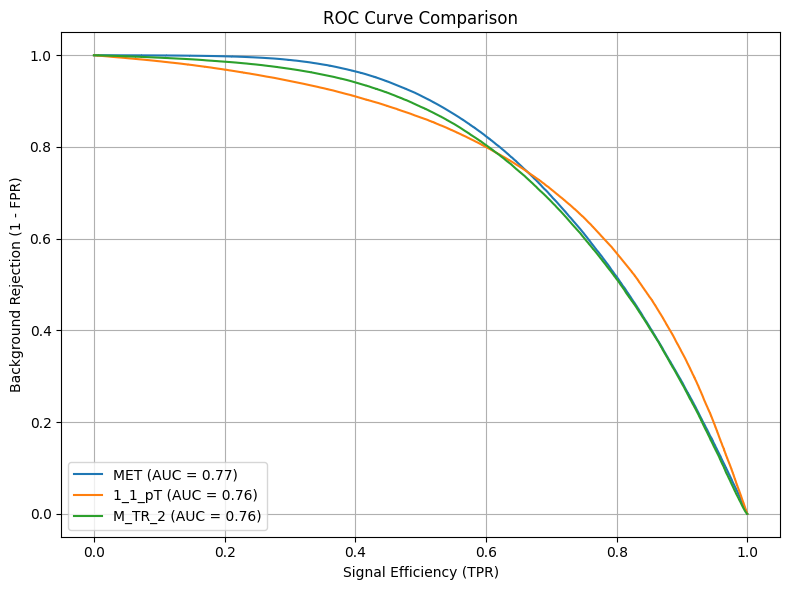

In [69]:
#Exercise 7.1 & 7.2- ROC Curve Function and Visualization

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Utility function to plot ROC curve for a list of variables
def plot_rocs(df_sig, df_bkg, variables, title="ROC Curve Comparison"):
    plt.figure(figsize=(8, 6))

    for var in variables:
        y_true = np.concatenate([np.ones(len(df_sig)), np.zeros(len(df_bkg))])
        y_scores = np.concatenate([df_sig[var], df_bkg[var]])

        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.plot(tpr, 1 - fpr, label=f"{var} (AUC = {roc_auc:.2f})")

    plt.xlabel("Signal Efficiency (TPR)")
    plt.ylabel("Background Rejection (1 - FPR)")
    plt.title(title)
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Run ROC curves for top 3 variables (Exercise 7.1)
plot_rocs(df_sig, df_bkg, ["MET", "1_1_pT", "M_TR_2"])

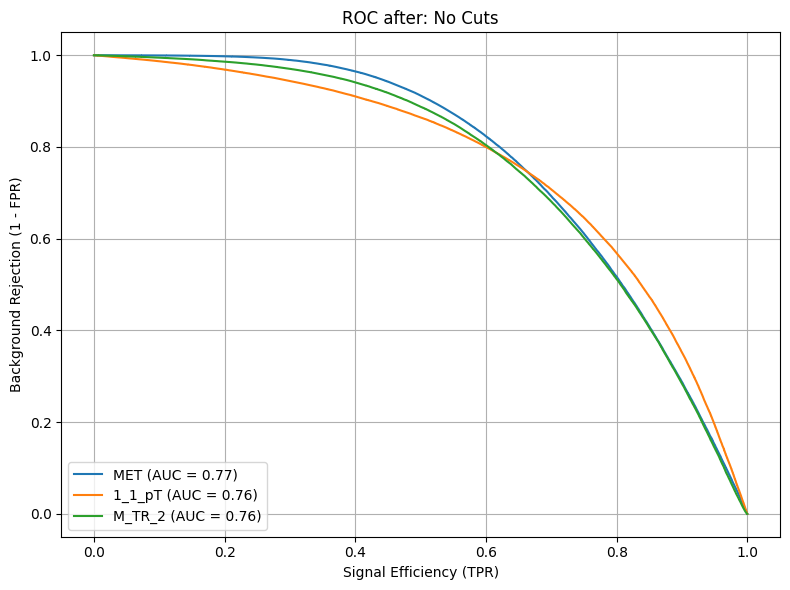

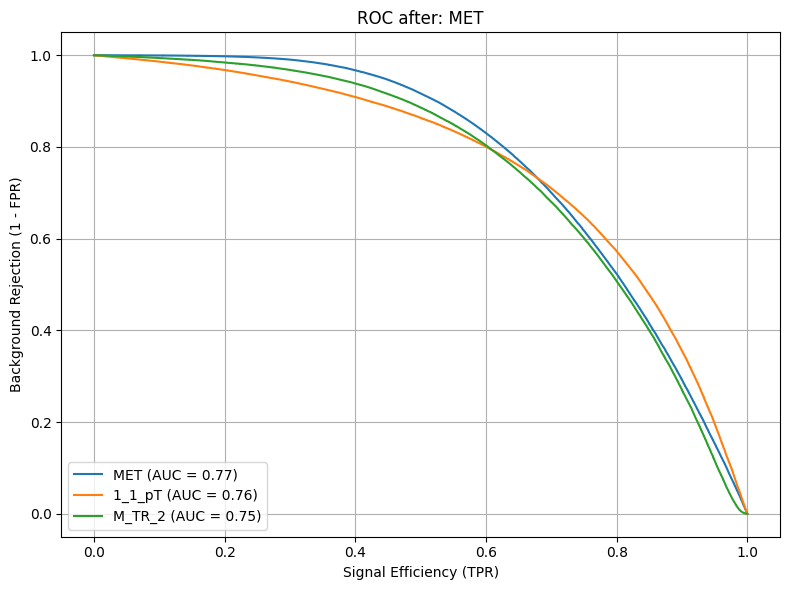

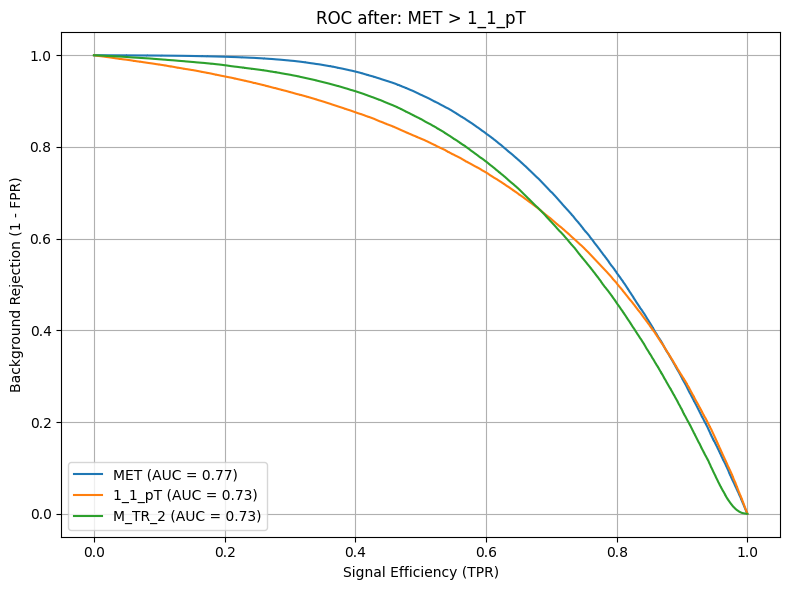

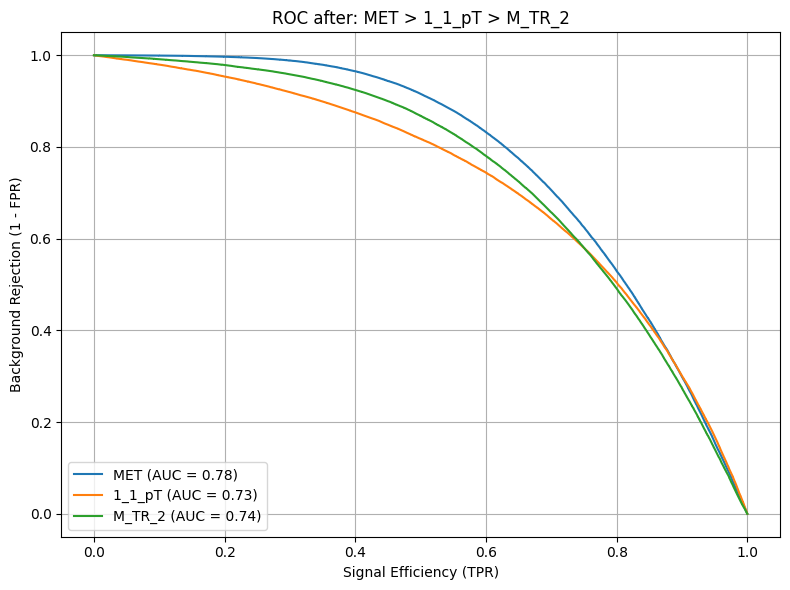

In [70]:
#Exercise 7.3-Visualizing ROC Curve Evolution After Sequential Cuts

# Apply cuts one by one and plot ROC after each stage
def plot_rocs_after_cuts(df_sig, df_bkg, cut_vars, thresholds, strategy="greater"):
    df_s = df_sig.copy()
    df_b = df_bkg.copy()

    for i in range(len(cut_vars) + 1):
        # Apply i cuts
        for var in cut_vars[:i]:
            xc = thresholds[var]
            if strategy == "greater":
                df_s = df_s[df_s[var] > xc]
                df_b = df_b[df_b[var] > xc]

        cut_desc = " > ".join(cut_vars[:i]) if i > 0 else "No Cuts"
        plot_rocs(df_s, df_b, cut_vars, title=f"ROC after: {cut_desc if cut_desc else 'No Cuts'}")

#Run for cut order MET → 1_1_pT → M_TR_2
plot_rocs_after_cuts(df_sig, df_bkg, ["MET", "1_1_pT", "M_TR_2"], thresholds)


 Cut Order: ('MET', '1_1_pT', 'M_TR_2')


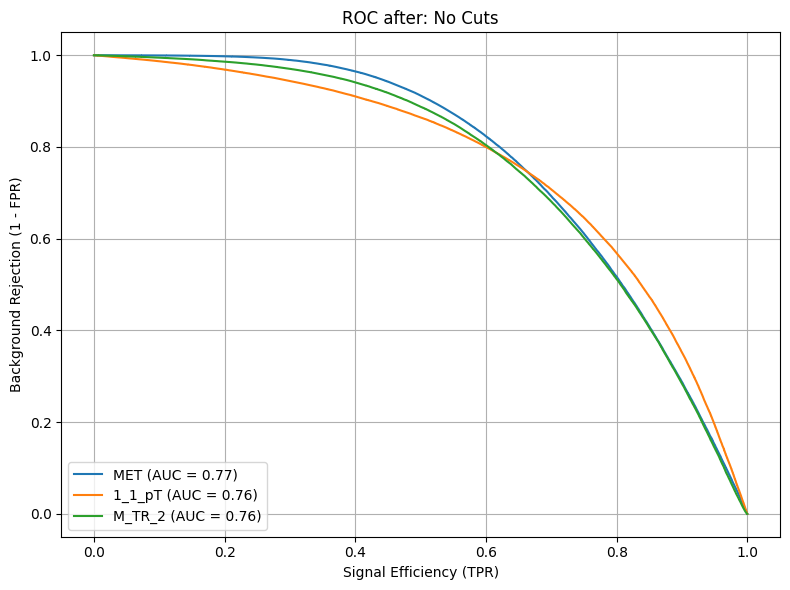

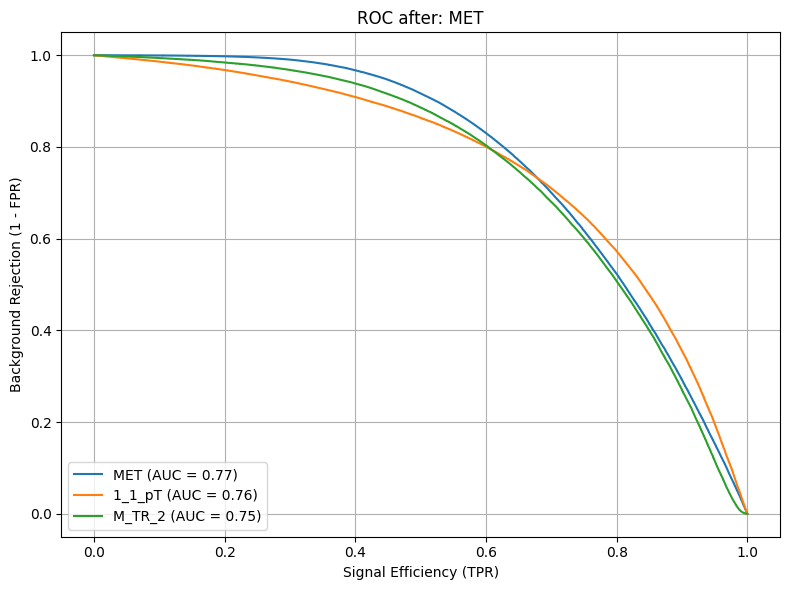

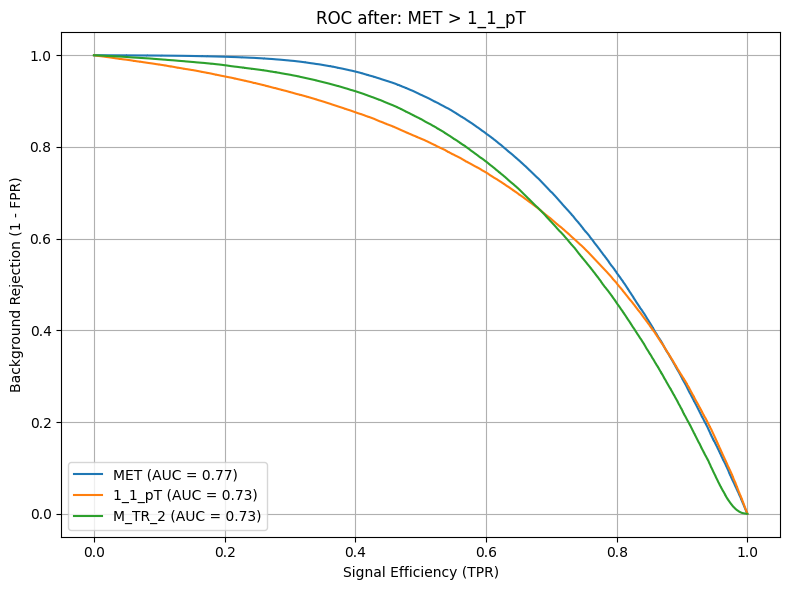

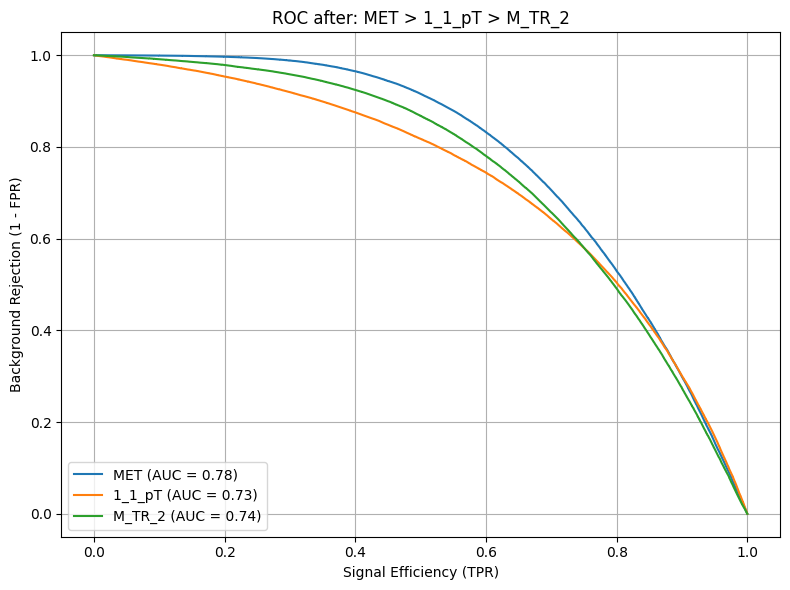


 Cut Order: ('MET', 'M_TR_2', '1_1_pT')


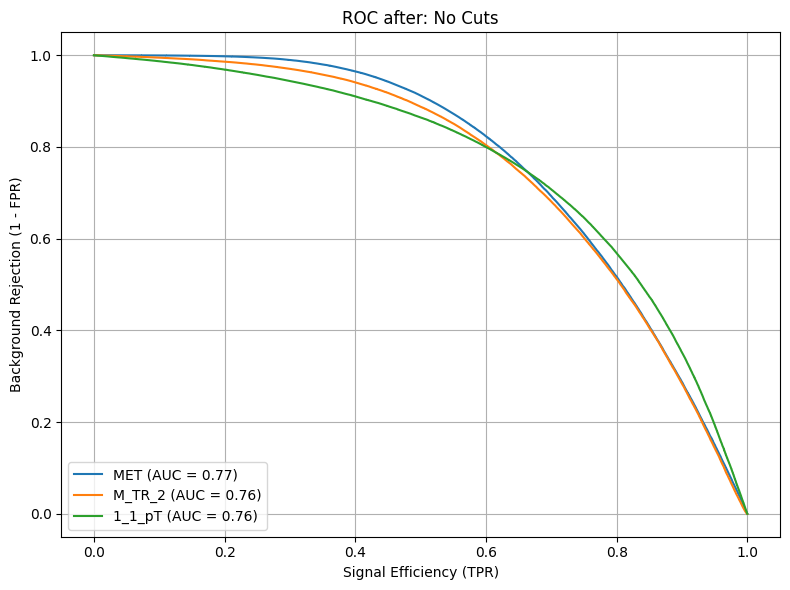

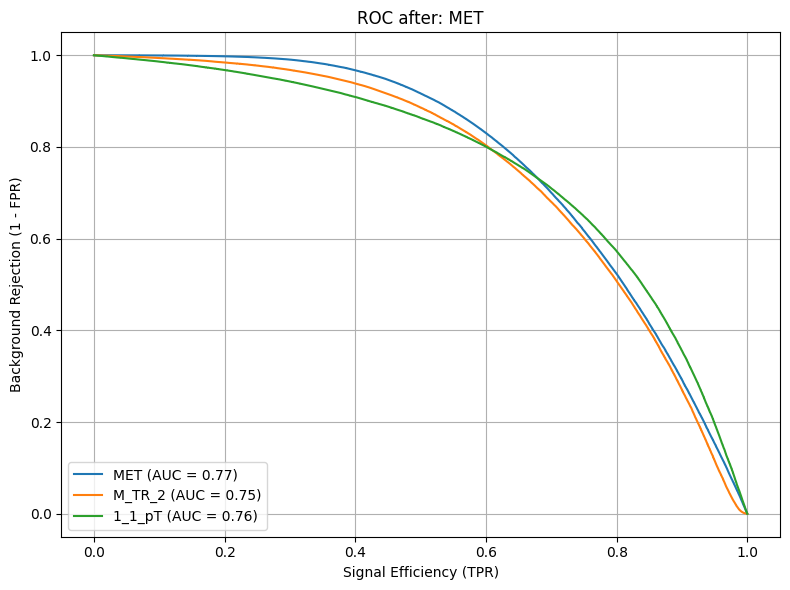

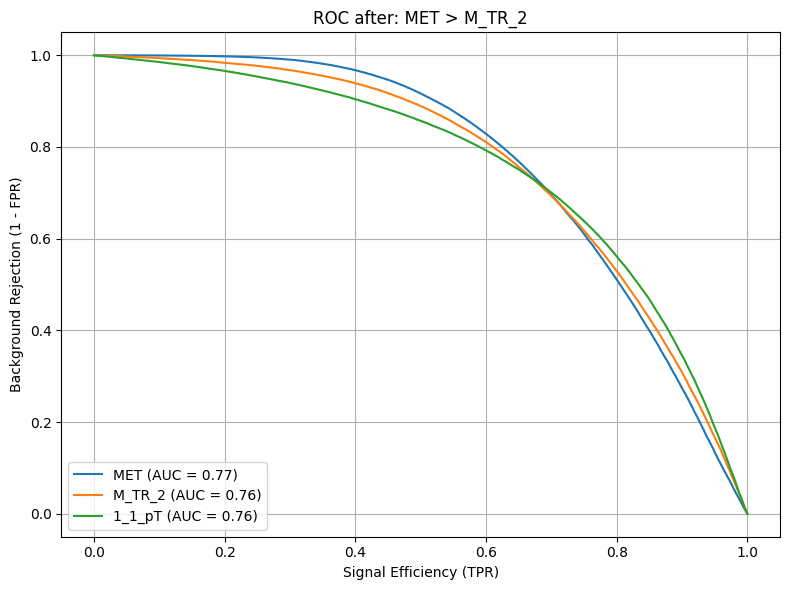

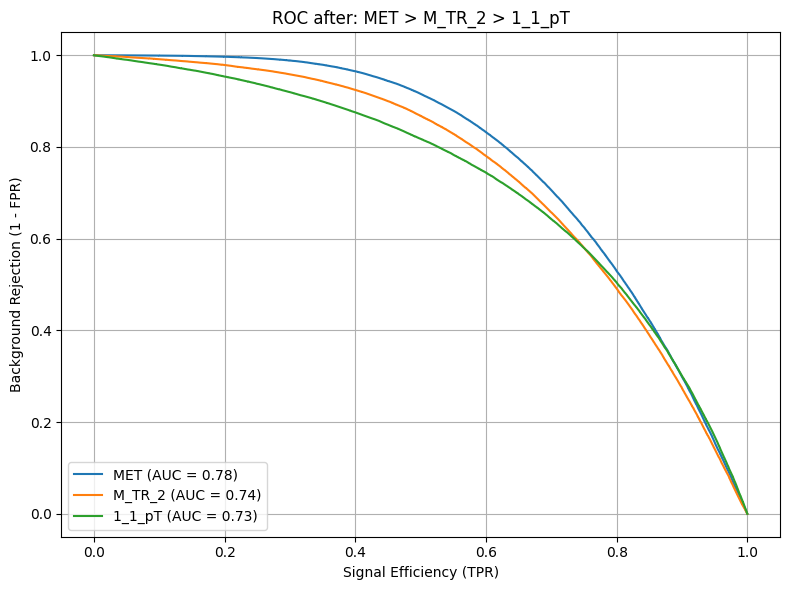


 Cut Order: ('1_1_pT', 'MET', 'M_TR_2')


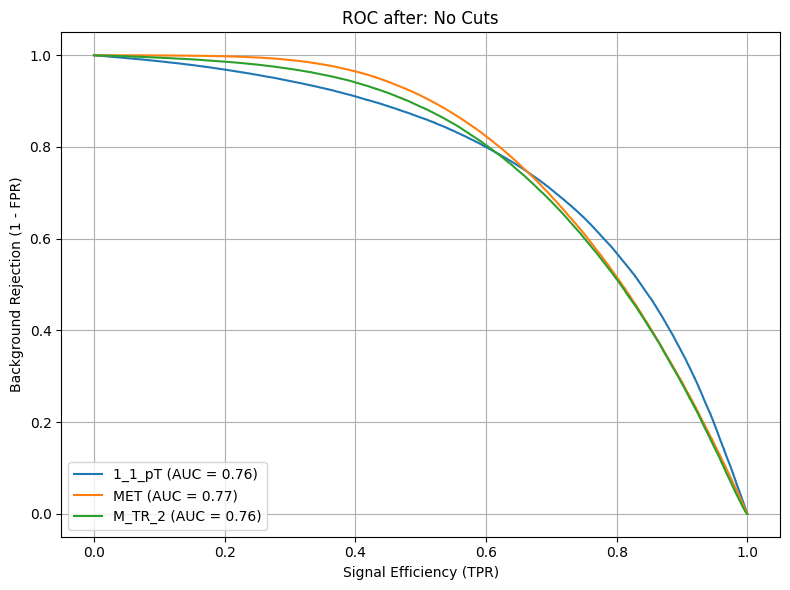

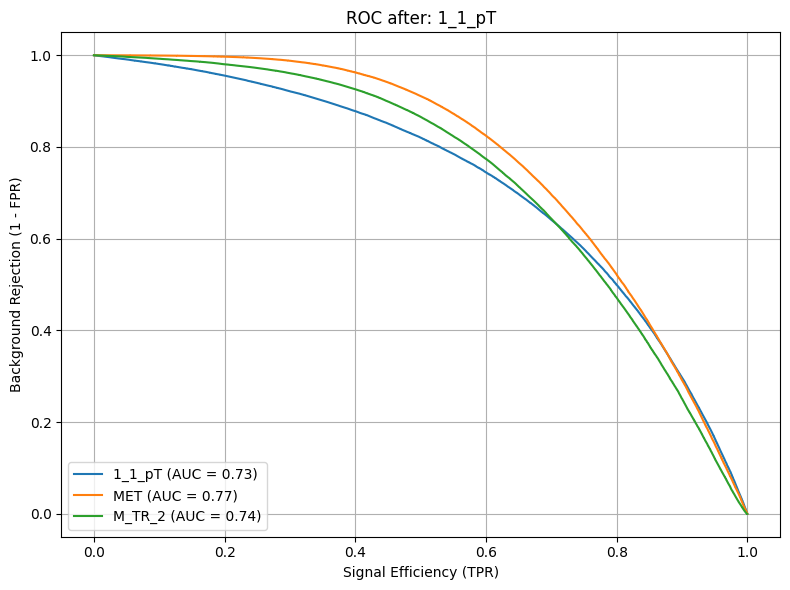

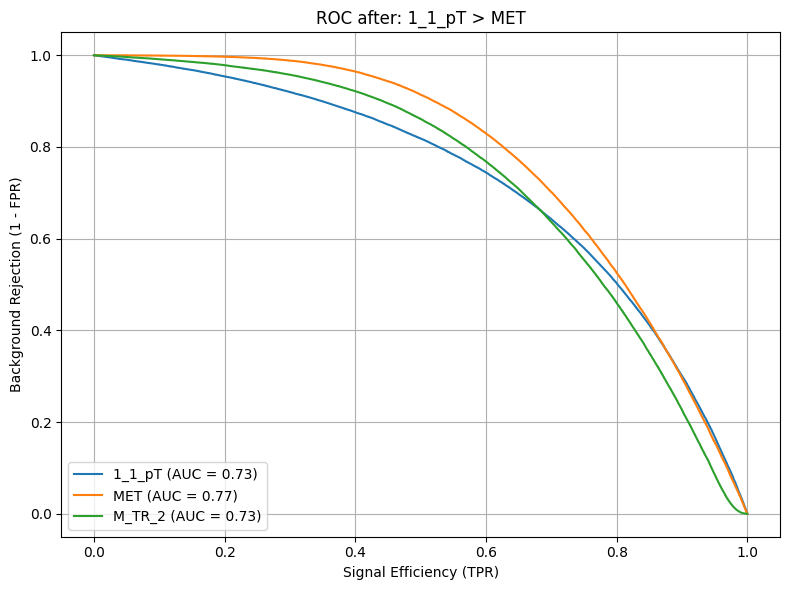

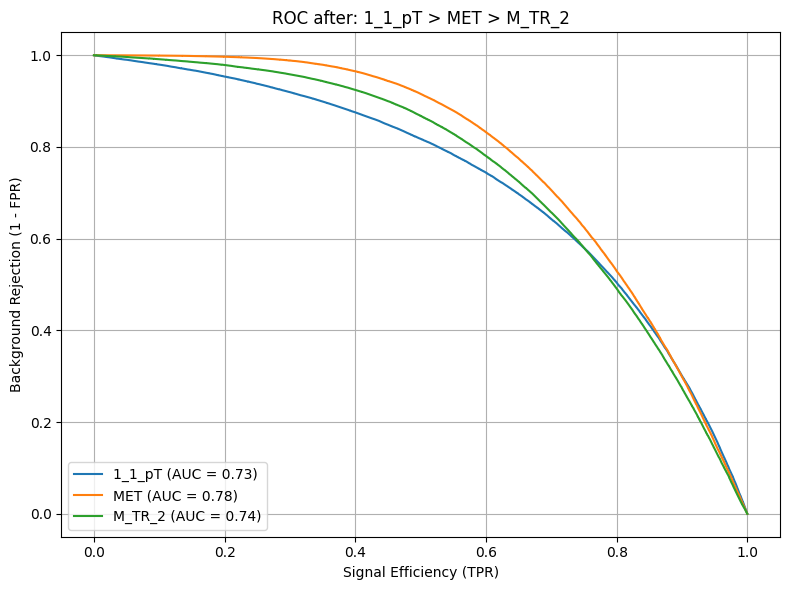


 Cut Order: ('1_1_pT', 'M_TR_2', 'MET')


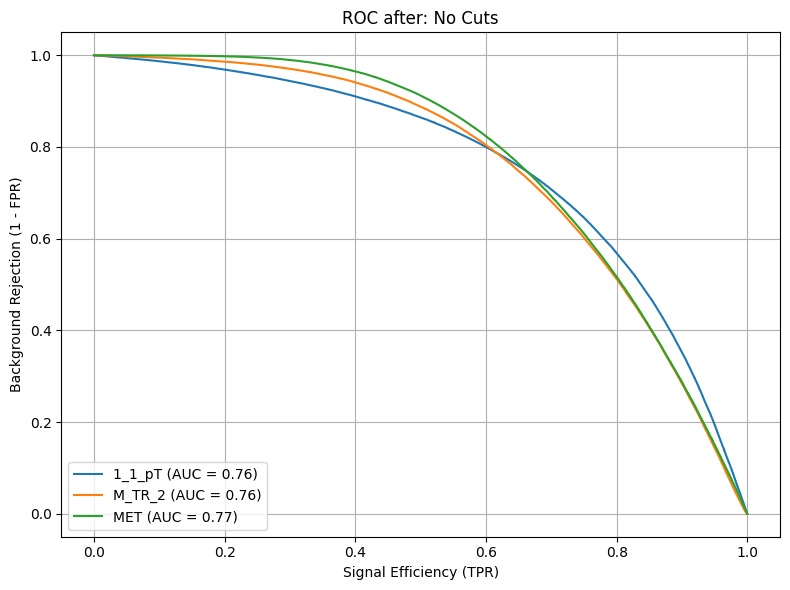

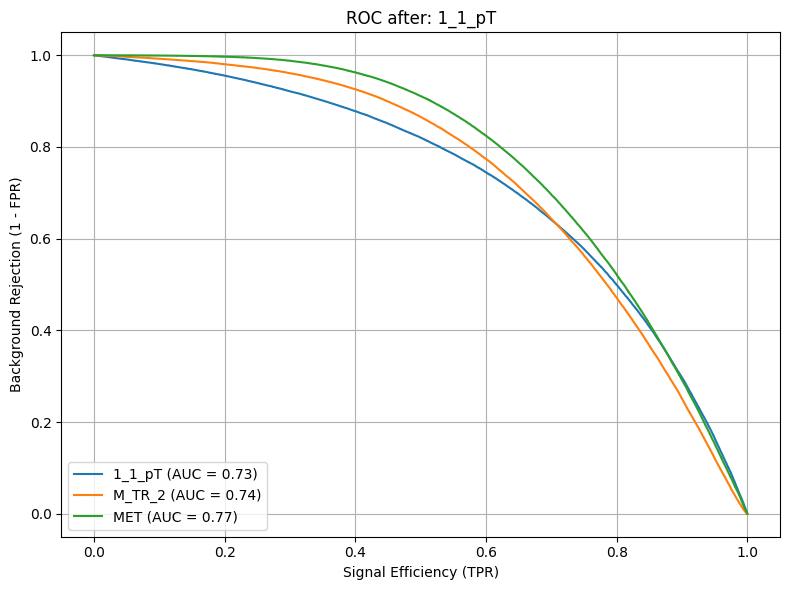

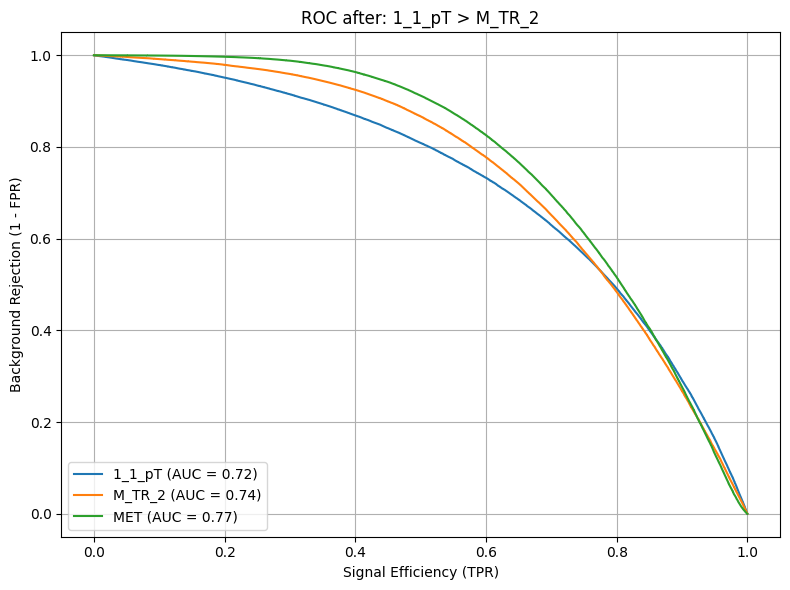

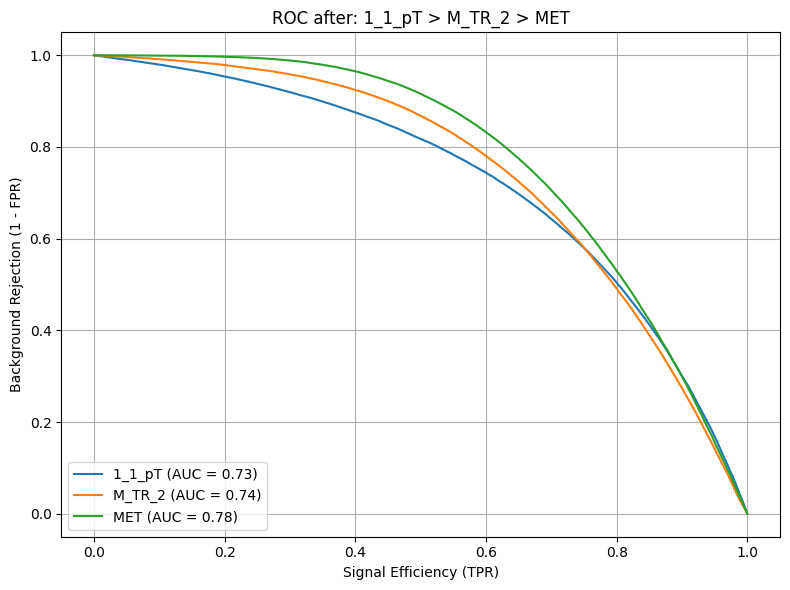


 Cut Order: ('M_TR_2', 'MET', '1_1_pT')


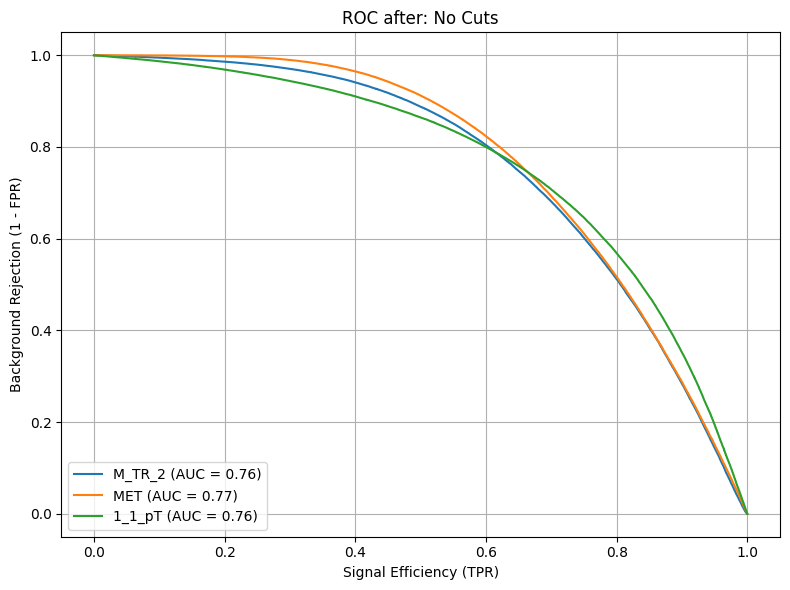

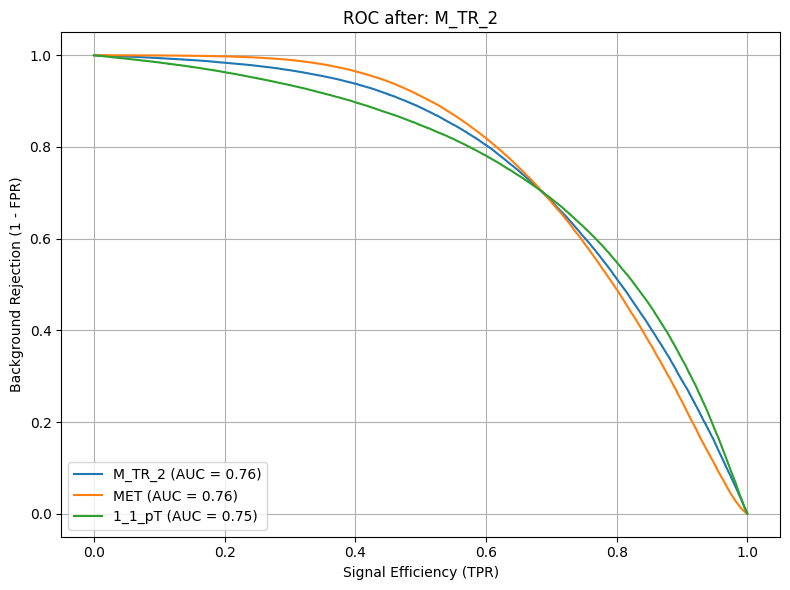

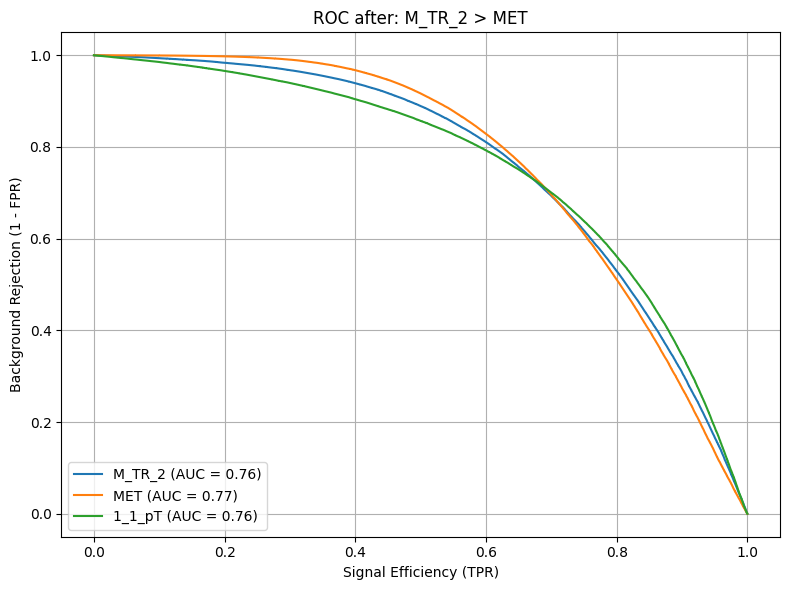

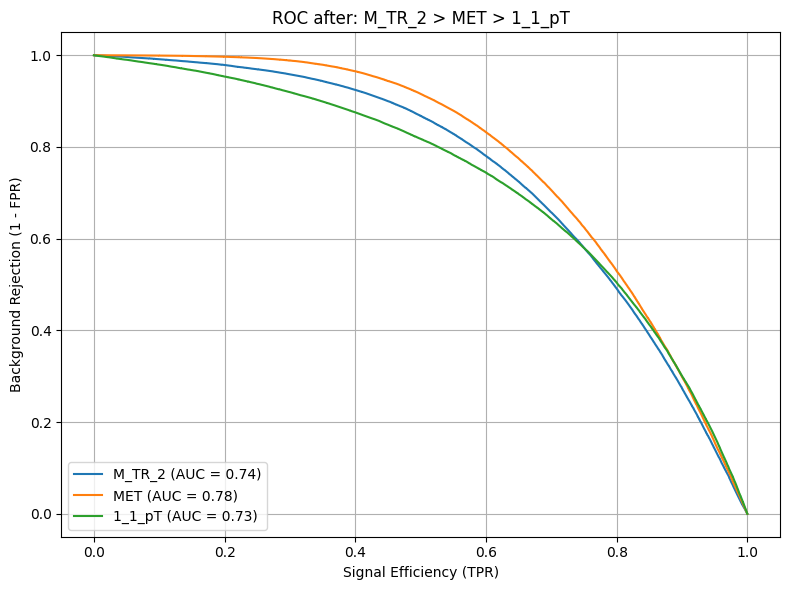


 Cut Order: ('M_TR_2', '1_1_pT', 'MET')


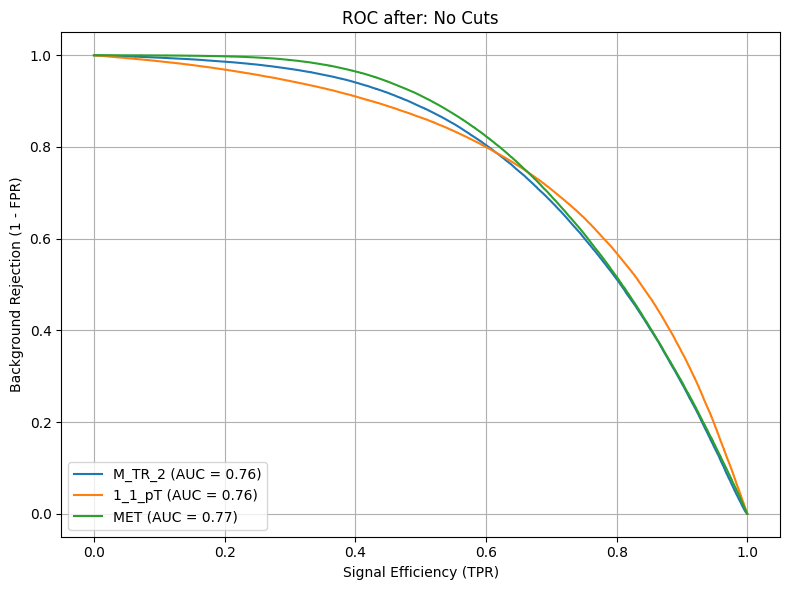

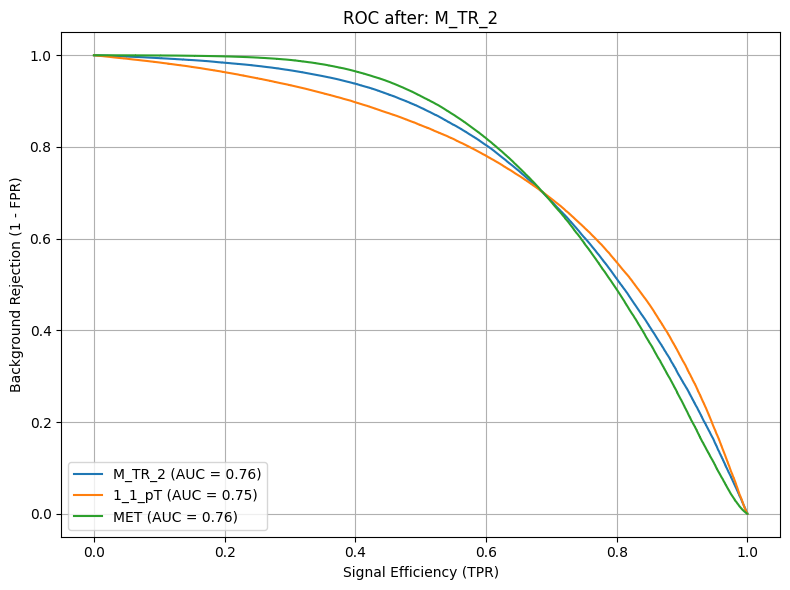

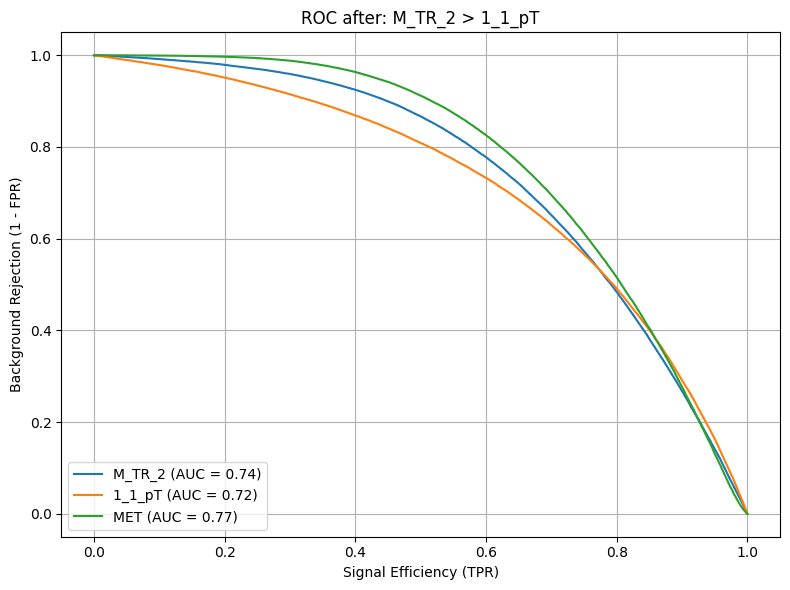

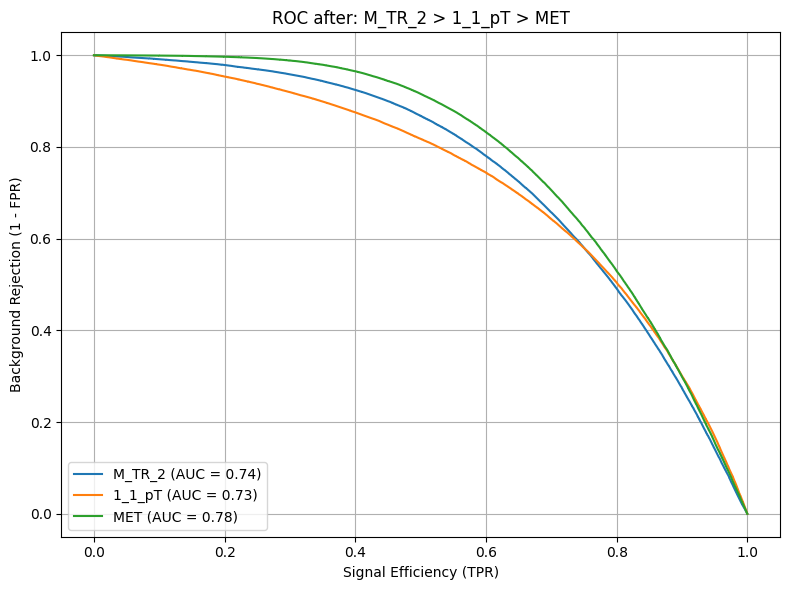

In [71]:
#Exercise 7.4-Comparing ROC Curves Across Different Cut Orders

from itertools import permutations

# Plot ROC changes for all cut orders
def compare_roc_by_order(df_sig, df_bkg, cut_vars, thresholds):
    orders = list(permutations(cut_vars))

    for order in orders:
        print(f"\n Cut Order: {order}")
        plot_rocs_after_cuts(df_sig, df_bkg, list(order), thresholds)

#Try all permutations of the 3 selected variables
compare_roc_by_order(df_sig, df_bkg, ["MET", "1_1_pT", "M_TR_2"], thresholds)

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$.

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5?

In [84]:
#Exercise 8.1-a-Compute between-class and within-class covariance matrices
import numpy as np

# Select top 3 variables
lda_vars = ["MET", "1_1_pT", "M_TR_2"]

# Get feature matrices
X_sig = df_sig[lda_vars].to_numpy()
X_bkg = df_bkg[lda_vars].to_numpy()

# Compute class means
mu_sig = np.mean(X_sig, axis=0)
mu_bkg = np.mean(X_bkg, axis=0)

# Between-class scatter matrix
SB = np.outer(mu_bkg - mu_sig, mu_bkg - mu_sig)

# Within-class scatter matrix
SW_sig = sum([(x - mu_sig).reshape(-1,1) @ (x - mu_sig).reshape(1,-1) for x in X_sig])
SW_bkg = sum([(x - mu_bkg).reshape(-1,1) @ (x - mu_bkg).reshape(1,-1) for x in X_bkg])
SW = SW_sig + SW_bkg


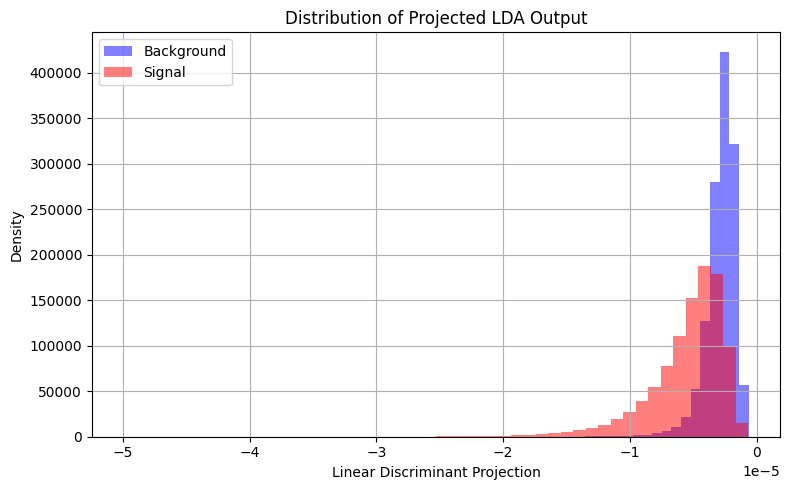

In [73]:
#Exercise 8.1-b-Calculate the LDA coefficient vector w and visualize the distribution
# Compute linear discriminant vector
w = np.linalg.inv(SW) @ (mu_bkg - mu_sig)

# Project data
F_sig = X_sig @ w
F_bkg = X_bkg @ w

# Plot histograms of projections
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(F_bkg, bins=50, alpha=0.5, label="Background", density=True, color='blue')
plt.hist(F_sig, bins=50, alpha=0.5, label="Signal", density=True, color='red')
plt.xlabel("Linear Discriminant Projection")
plt.ylabel("Density")
plt.title("Distribution of Projected LDA Output")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


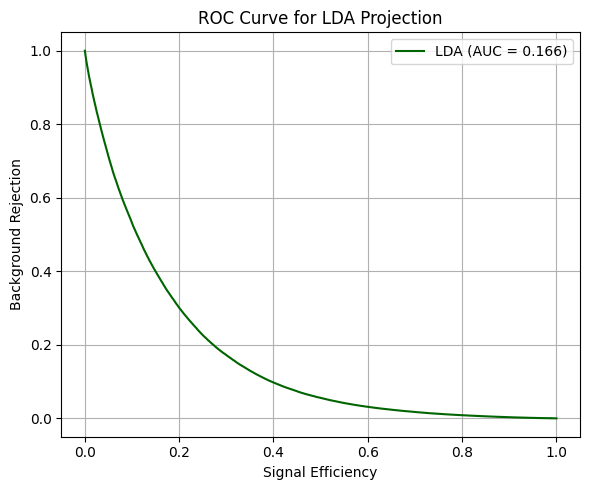

In [74]:
#Exercise 8.1-c-Draw the ROC curve and compute the AUC for the LDA result
from sklearn.metrics import roc_curve, auc

# Combine labels and scores
y_true = np.concatenate([np.ones(len(F_sig)), np.zeros(len(F_bkg))])
scores = np.concatenate([F_sig, F_bkg])

# ROC curve
fpr, tpr, _ = roc_curve(y_true, scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,5))
plt.plot(tpr, 1 - fpr, label=f"LDA (AUC = {roc_auc:.3f})", color='darkgreen')
plt.xlabel("Signal Efficiency")
plt.ylabel("Background Rejection")
plt.title("ROC Curve for LDA Projection")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
#Exercise 8.1-d-Calculate the maximum significance for the scenarios defined in Exercise 5

# Signal efficiency (TPR) and background efficiency (FPR)
eff_s = tpr
eff_b = fpr

# Try different N_S / N_B scenarios
scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]

for N_S, N_B in scenarios:
    N_s_prime = eff_s * N_S
    N_b_prime = eff_b * N_B
    sigma_s = N_s_prime / np.sqrt(N_s_prime + N_b_prime)
    max_sig = np.max(sigma_s)
    print(f"Scenario N_S={N_S}, N_B={N_B} → max σ_s' = {max_sig:.4f}")


Scenario N_S=10, N_B=100 → max σ_s' = nan
Scenario N_S=100, N_B=1000 → max σ_s' = nan
Scenario N_S=1000, N_B=10000 → max σ_s' = nan
Scenario N_S=10000, N_B=100000 → max σ_s' = nan


<ipython-input-75-984adde85638>:13: RuntimeWarning: invalid value encountered in divide
  sigma_s = N_s_prime / np.sqrt(N_s_prime + N_b_prime)


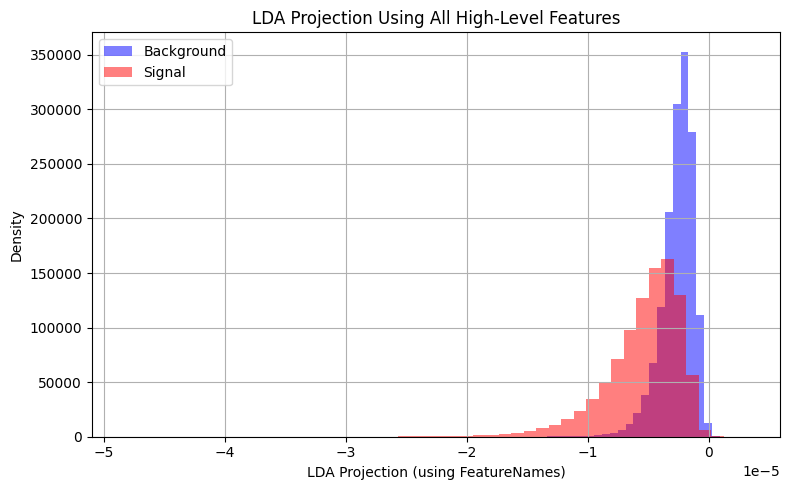

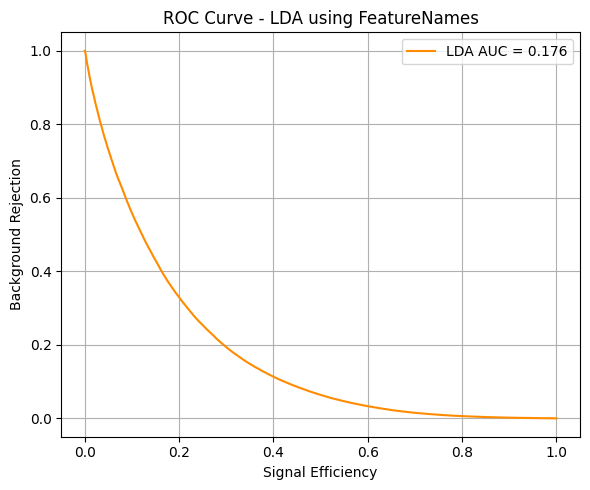

Scenario N_S=10, N_B=100 → max σ_s' = nan
Scenario N_S=100, N_B=1000 → max σ_s' = nan
Scenario N_S=1000, N_B=10000 → max σ_s' = nan
Scenario N_S=10000, N_B=100000 → max σ_s' = nan


<ipython-input-85-adcaeb850e3c>:63: RuntimeWarning: invalid value encountered in divide
  sigma_s = N_s_prime / np.sqrt(N_s_prime + N_b_prime)


In [85]:
#The Rest of FeatureNames

FeatureNames = [
    'S_R', 'MET_rel', 'M_R', 'dPhi_r_b', 'M_Delta_R',
    'MT2', 'axial_MET', 'R', 'M_TR_2', 'cos_theta_r1'
]

#1. Compute Between-Class and Within-Class Covariance Matrices
X_sig = df_sig[FeatureNames].to_numpy()
X_bkg = df_bkg[FeatureNames].to_numpy()

mu_sig = np.mean(X_sig, axis=0)
mu_bkg = np.mean(X_bkg, axis=0)

SB = np.outer(mu_bkg - mu_sig, mu_bkg - mu_sig)

SW_sig = sum([(x - mu_sig).reshape(-1,1) @ (x - mu_sig).reshape(1,-1) for x in X_sig])
SW_bkg = sum([(x - mu_bkg).reshape(-1,1) @ (x - mu_bkg).reshape(1,-1) for x in X_bkg])
SW = SW_sig + SW_bkg

#2. LDA Projection and Visualization
w = np.linalg.inv(SW) @ (mu_bkg - mu_sig)

F_sig = X_sig @ w
F_bkg = X_bkg @ w

plt.figure(figsize=(8,5))
plt.hist(F_bkg, bins=50, alpha=0.5, label="Background", density=True, color='blue')
plt.hist(F_sig, bins=50, alpha=0.5, label="Signal", density=True, color='red')
plt.xlabel("LDA Projection (using FeatureNames)")
plt.ylabel("Density")
plt.title("LDA Projection Using All High-Level Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#3. ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

y_true = np.concatenate([np.ones(len(F_sig)), np.zeros(len(F_bkg))])
scores = np.concatenate([F_sig, F_bkg])

fpr, tpr, _ = roc_curve(y_true, scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(tpr, 1 - fpr, label=f"LDA AUC = {roc_auc:.3f}", color='darkorange')
plt.xlabel("Signal Efficiency")
plt.ylabel("Background Rejection")
plt.title("ROC Curve - LDA using FeatureNames")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#4. Maximum Significance for Each Scenario
scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]

for N_S, N_B in scenarios:
    N_s_prime = tpr * N_S
    N_b_prime = fpr * N_B
    sigma_s = N_s_prime / np.sqrt(N_s_prime + N_b_prime)
    max_sig = np.max(sigma_s)
    print(f"Scenario N_S={N_S}, N_B={N_B} → max σ_s' = {max_sig:.4f}")


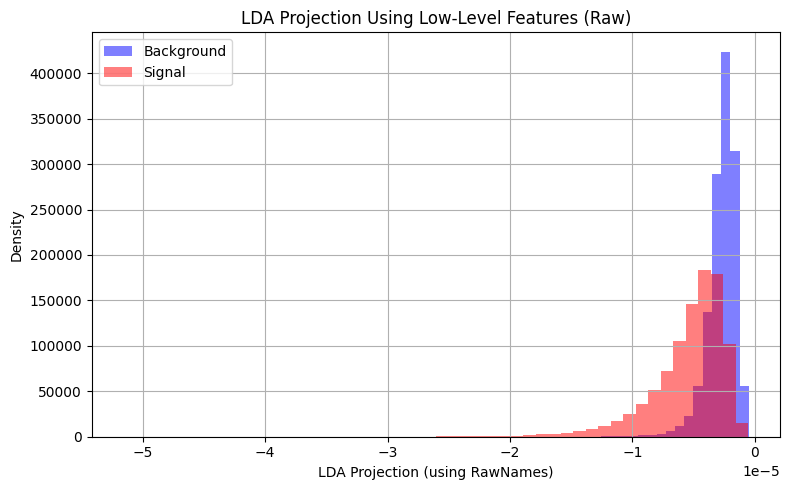

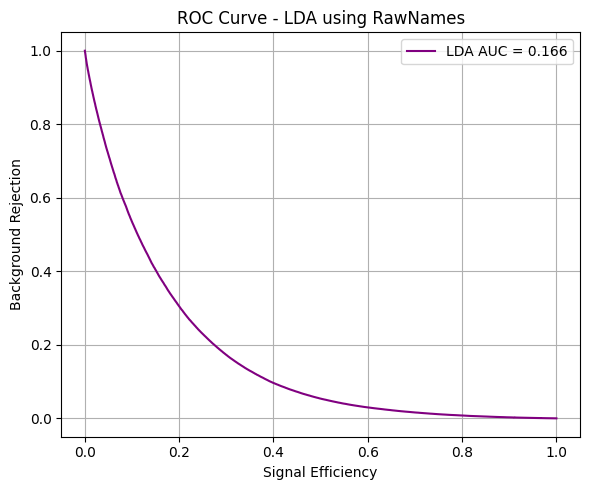

Scenario N_S=10, N_B=100 → max σ_s' = nan
Scenario N_S=100, N_B=1000 → max σ_s' = nan
Scenario N_S=1000, N_B=10000 → max σ_s' = nan
Scenario N_S=10000, N_B=100000 → max σ_s' = nan


<ipython-input-86-ce6485e5efd3>:64: RuntimeWarning: invalid value encountered in divide
  sigma_s_raw = N_s_prime_raw / np.sqrt(N_s_prime_raw + N_b_prime_raw)


In [86]:
#The Rest of RawNames

RawNames = [
    "1_1_pT", "1_1_eta", "1_1_phi",
    "1_2_pT", "1_2_eta", "1_2_phi",
    "MET", "MET_phi"
]

#1. Compute Between-Class and Within-Class Covariance Matrices
X_sig_raw = df_sig[RawNames].to_numpy()
X_bkg_raw = df_bkg[RawNames].to_numpy()

mu_sig_raw = np.mean(X_sig_raw, axis=0)
mu_bkg_raw = np.mean(X_bkg_raw, axis=0)

SB_raw = np.outer(mu_bkg_raw - mu_sig_raw, mu_bkg_raw - mu_sig_raw)

SW_sig_raw = sum([(x - mu_sig_raw).reshape(-1,1) @ (x - mu_sig_raw).reshape(1,-1) for x in X_sig_raw])
SW_bkg_raw = sum([(x - mu_bkg_raw).reshape(-1,1) @ (x - mu_bkg_raw).reshape(1,-1) for x in X_bkg_raw])
SW_raw = SW_sig_raw + SW_bkg_raw

#2. Calculate LDA Coefficients and Visualize Distribution
w_raw = np.linalg.inv(SW_raw) @ (mu_bkg_raw - mu_sig_raw)

F_sig_raw = X_sig_raw @ w_raw
F_bkg_raw = X_bkg_raw @ w_raw

plt.figure(figsize=(8,5))
plt.hist(F_bkg_raw, bins=50, alpha=0.5, label="Background", density=True, color='blue')
plt.hist(F_sig_raw, bins=50, alpha=0.5, label="Signal", density=True, color='red')
plt.xlabel("LDA Projection (using RawNames)")
plt.ylabel("Density")
plt.title("LDA Projection Using Low-Level Features (Raw)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#3. Draw ROC Curve and Compute AUC
from sklearn.metrics import roc_curve, auc

y_true_raw = np.concatenate([np.ones(len(F_sig_raw)), np.zeros(len(F_bkg_raw))])
scores_raw = np.concatenate([F_sig_raw, F_bkg_raw])

fpr_raw, tpr_raw, _ = roc_curve(y_true_raw, scores_raw)
auc_raw = auc(fpr_raw, tpr_raw)

plt.figure(figsize=(6,5))
plt.plot(tpr_raw, 1 - fpr_raw, label=f"LDA AUC = {auc_raw:.3f}", color='purple')
plt.xlabel("Signal Efficiency")
plt.ylabel("Background Rejection")
plt.title("ROC Curve - LDA using RawNames")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#4. Maximum Significance for Each Scenario
scenarios = [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]

for N_S, N_B in scenarios:
    N_s_prime_raw = tpr_raw * N_S
    N_b_prime_raw = fpr_raw * N_B
    sigma_s_raw = N_s_prime_raw / np.sqrt(N_s_prime_raw + N_b_prime_raw)
    max_sig_raw = np.max(sigma_s_raw)
    print(f"Scenario N_S={N_S}, N_B={N_B} → max σ_s' = {max_sig_raw:.4f}")
